# Exploração de Dados, Pré-processamento e Levantamento de Hipóteses

# Seção 4.2 (SPRINT 2)


Este notebook documenta a análise e transformação dos dados realizada durante a sprint. Serão apresentados os processos de exploração, pré-processamento dos dados e as hipóteses geradas a partir da análise.


## 4.2.1. Exploração de Dados (EDA)

Nesta seção, será apresentada uma análise detalhada das características das variáveis que compõem o conjunto de dados. O objetivo é identificar as principais tendências, padrões e possíveis inconsistências, facilitando o entendimento do comportamento dos dados. Esta análise é crucial para direcionar as etapas subsequentes do desenvolvimento do modelo preditivo.


### Carregando os Dados


#### Instalando bibliotecas


In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn scipy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\inteli\appdata\local\programs\python\python312\lib\site-packages (1.26.4)




[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Fazendo o merge das tabelas


In [2]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

generate_plots = True  # Mude caso queira regerar todos os gráficos (pode demorar)

# Definindo os caminhos dos arquivos
file_paths = [
    "../assets/dataset/month_2.csv",
    "../assets/dataset/month_3.csv",
    "../assets/dataset/month_4.csv",
    "../assets/dataset/month_5.csv",
    "../assets/dataset/month_6.csv",
]

info_cadastral = pd.read_csv("../assets/dataset/informacao_cadastral.csv")


# Carregando os arquivos em DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Junta todos os DataFrames em um único DataFrame por 'clientCode' e 'clientIndex'
df_mensal = pd.concat(dfs, ignore_index=True)
df = pd.merge(df_mensal, info_cadastral, on=["clientCode", "clientIndex"], how="left")

# Exibe as primeiras 5 linhas do DataFrame
df.head()

,clientCode,clientIndex,meterIndex,initialIndex,pulseCount,gain,datetime,meterSN,inputType,model,...,gatewayGeoLocation.long,cep,bairro,cidade,categoria,contratacao,situacao,perfil_consumo,condCode,condIndex
0,7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...,0,24.64,10.113,1453.0,0.01,2024-02-01 05:05:51,5050102C02ZD,DI1,IG1K-L-v2,...,NaN,90670-130,JARDIM BOTÂNICO,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0
1,7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...,0,24.64,10.113,1453.0,0.01,2024-02-01 17:34:40,5050102C02ZD,DI1,IG1K-L-v2,...,NaN,90670-130,JARDIM BOTÂNICO,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0
2,7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...,0,24.64,10.113,1453.0,0.01,2024-02-01 21:43:25,5050102C02ZD,DI1,IG1K-L-v2,...,NaN,90670-130,JARDIM BOTÂNICO,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0
3,2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...,0,69.08,25.916,4316.0,0.01,2024-02-01 00:34:16,Z1112C100D22,DI4,IG1K-L-v2,...,NaN,90670-130,JARDIM BOTÂNICO,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0
4,2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...,0,69.22,25.916,4330.0,0.01,2024-02-01 03:42:26,Z1112C100D22,DI4,IG1K-L-v2,...,NaN,90670-130,JARDIM BOTÂNICO,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0


In [3]:
print(f"Colunas no dataframe (df): \n\n{df.columns}")

Colunas no dataframe (df): 

Index(['clientCode', 'clientIndex', 'meterIndex', 'initialIndex', 'pulseCount',
       'gain', 'datetime', 'meterSN', 'inputType', 'model', 'rssi',
       'gatewayGeoLocation.alt', 'gatewayGeoLocation.lat',
       'gatewayGeoLocation.long', 'cep', 'bairro', 'cidade', 'categoria',
       'contratacao', 'situacao', 'perfil_consumo', 'condCode', 'condIndex'],
      dtype='object')


### Estatística Descritiva

A seguir, são apresentadas as estatísticas descritivas básicas de cada coluna do conjunto de dados, bem como a classificação das variáveis em numéricas ou categóricas.


#### Descrição Básica


In [4]:
# Mostra o tamanho e a forma do DataFrame
print(
    f"Formato do DataFrame (linha, colunas): \nLinhas: {df.shape[0]} \nColunas: {df.shape[1]}"
)

# Estatísticas descritivas do DataFrame (média, desvio padrão, mínimo, máximo, etc)
print("\nEstatísticas descritivas:")
df.describe().apply(lambda x: x.apply("{:.2f}".format))

Formato do DataFrame (linha, colunas): 
Linhas: 2951243 
Colunas: 23

Estatísticas descritivas:


,clientIndex,meterIndex,initialIndex,pulseCount,gain,rssi,gatewayGeoLocation.alt,gatewayGeoLocation.lat,gatewayGeoLocation.long,condIndex
count,2951243.00,2951243.00,2951243.00,2951243.00,1976800.00,1467568.00,618081.00,618081.00,618081.00,2777461.00
mean,0.04,1387.27,1324.94,3696.61,0.01,-101.48,96.69,-30.02,-51.20,0.00
std,0.38,21438.47,21359.00,18996.82,0.01,13.78,59.80,0.27,0.19,0.00
min,0.00,-89.00,-89.00,0.00,0.01,-131.00,32.00,-30.13,-51.24,0.00
25%,0.00,10.53,0.00,46.12,0.01,-112.00,65.00,-30.09,-51.23,0.00
50%,0.00,35.09,2.87,378.00,0.01,-105.00,91.00,-30.03,-51.23,0.00
75%,0.00,90.30,19.41,2574.00,0.01,-96.00,103.00,-30.03,-51.19,0.00
max,10.00,644396.63,641554.33,4010299.00,0.10,123.00,923.00,-22.94,-46.37,0.00


#### Analisando valores nulos


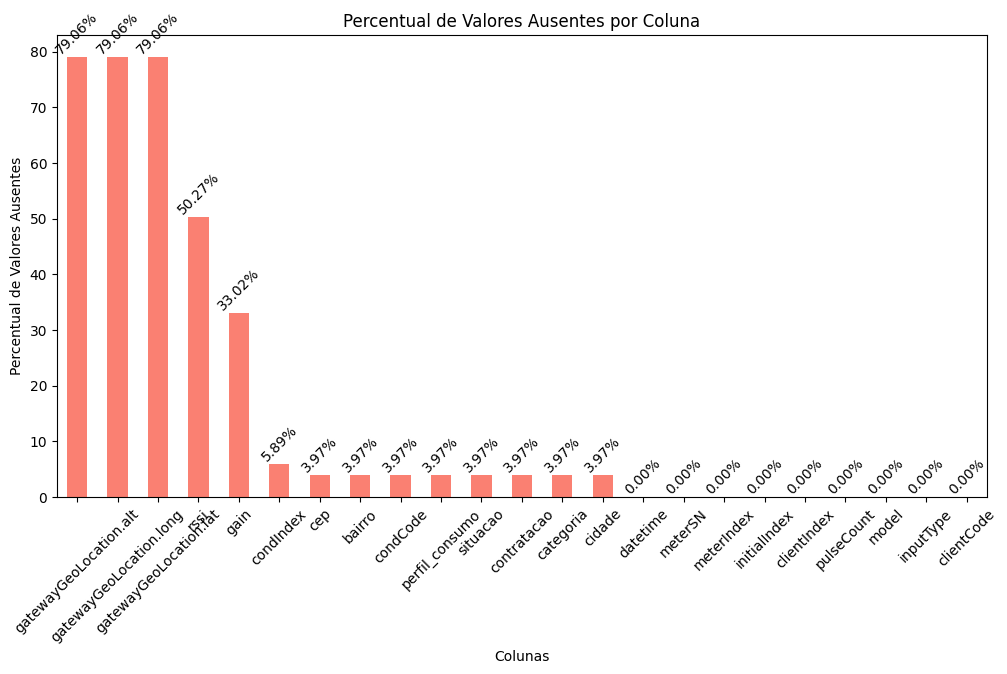

In [5]:
import matplotlib.pyplot as plt

# Calcula a porcentagem de valores ausentes em cada coluna
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Ordena as colunas com valores ausentes em ordem decrescente
missing_percentage = missing_percentage.sort_values(ascending=False)

# Cria um gráfico de barras com as porcentagens de valores ausentes
plt.figure(figsize=(12, 6))
bars = missing_percentage.plot(kind="bar", color="salmon")
plt.title("Percentual de Valores Ausentes por Coluna")
plt.xlabel("Colunas")
plt.ylabel("Percentual de Valores Ausentes")
plt.xticks(rotation=45)

# Adiciona os números de valores nulos na diagonal
for bar, missing_count in zip(bars.patches, missing_percentage):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{missing_count:.2f}%",
        ha="center",
        va="bottom",
        rotation=45,
    )

plt.show()

As colunas de geolocalização ('gatewayGeoLocation.alt', 'gatewayGeoLocation.lat' e 'gatewayGeoLocation.long') tem quase 80% de nulos


#### Tipos de dados cada coluna


In [6]:
df.dtypes

clientCode                  object
clientIndex                  int64
meterIndex                 float64
initialIndex               float64
pulseCount                 float64
gain                       float64
datetime                    object
meterSN                     object
inputType                   object
model                       object
rssi                       float64
gatewayGeoLocation.alt     float64
gatewayGeoLocation.lat     float64
gatewayGeoLocation.long    float64
cep                         object
bairro                      object
cidade                      object
categoria                   object
contratacao                 object
situacao                    object
perfil_consumo              object
condCode                    object
condIndex                  float64
dtype: object

In [7]:
# Separando as colunas entre identificadoras, categóricas e numéricas
id_features = ["clientCode", "clientIndex", "condCode", "condIndex", "meterSN"]
categorical_features = [
    col
    for col in df.select_dtypes(include=["object"]).columns
    if col not in id_features
]
numerical_features = [
    col
    for col in df.select_dtypes(include=["int64", "float64"]).columns
    if col not in id_features
]

# Exibindo as colunas categóricas e numéricas
print(f"{len(id_features)} id features:", id_features)
print(f"{len(categorical_features)} categorical features:", categorical_features)
print(f"{len(numerical_features)} numerical features:", numerical_features)

5 id features: ['clientCode', 'clientIndex', 'condCode', 'condIndex', 'meterSN']
10 categorical features: ['datetime', 'inputType', 'model', 'cep', 'bairro', 'cidade', 'categoria', 'contratacao', 'situacao', 'perfil_consumo']
8 numerical features: ['meterIndex', 'initialIndex', 'pulseCount', 'gain', 'rssi', 'gatewayGeoLocation.alt', 'gatewayGeoLocation.lat', 'gatewayGeoLocation.long']


### Explorando Variáveis Chave e Relações


#### Matriz de Correlação


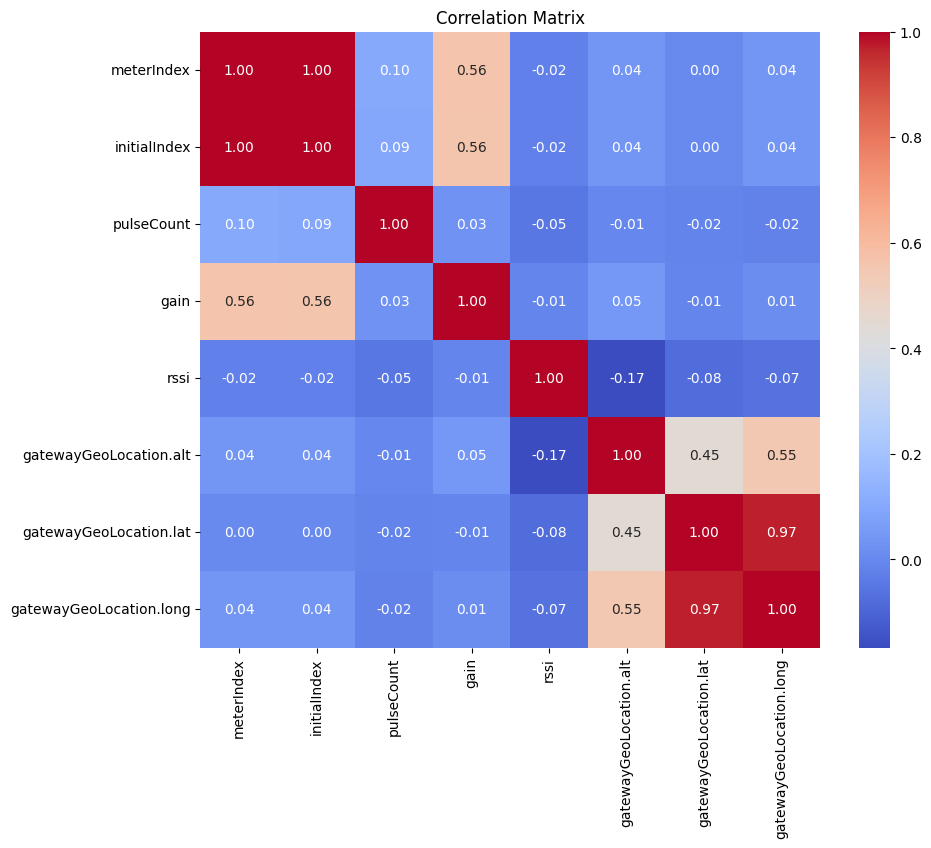

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação
correlation_matrix = df[numerical_features].corr()

# Cria um gráfico de calor com a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Gráfico de Dispersão de meterIndex vs. initialIndex com gain como Escala de Cor


In [9]:
# plt.figure(figsize=(10, 6))
# scatter = sns.scatterplot(data=df, x='meterIndex', y='initialIndex', hue='gain', palette='viridis', s=100)
# plt.title('Gráfico de Dispersão de meterIndex vs. initialIndex com gain como Escala de Cor')
# plt.xlabel('Meter Index')
# plt.ylabel('Initial Index')

# # Adiciona a legenda ao gráfico
# scatter.legend(title='Gain')
# plt.show()

#### Histograma de RSSI


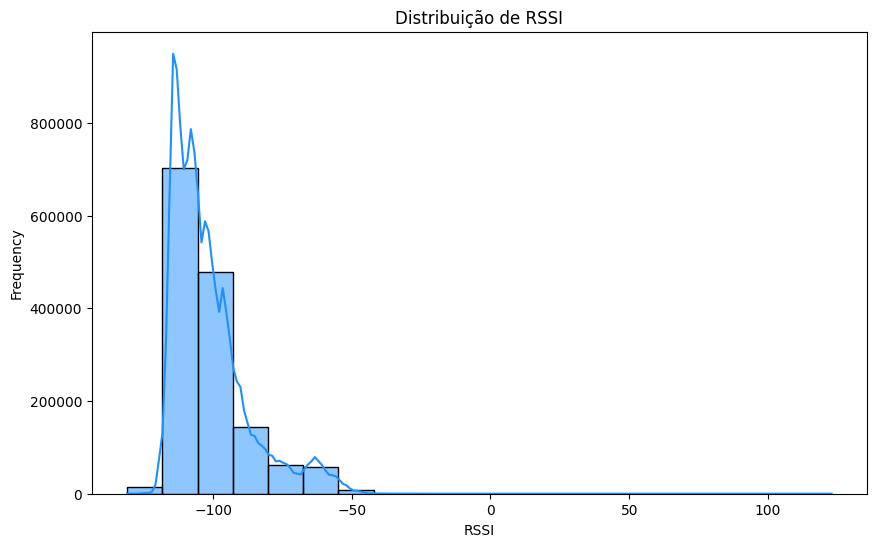

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df["rssi"], kde=True, bins=20, color="dodgerblue")
plt.title("Distribuição de RSSI")
plt.xlabel("RSSI")
plt.ylabel("Frequency")
plt.show()

#### Scatter Plot de Gain e Pulse Count


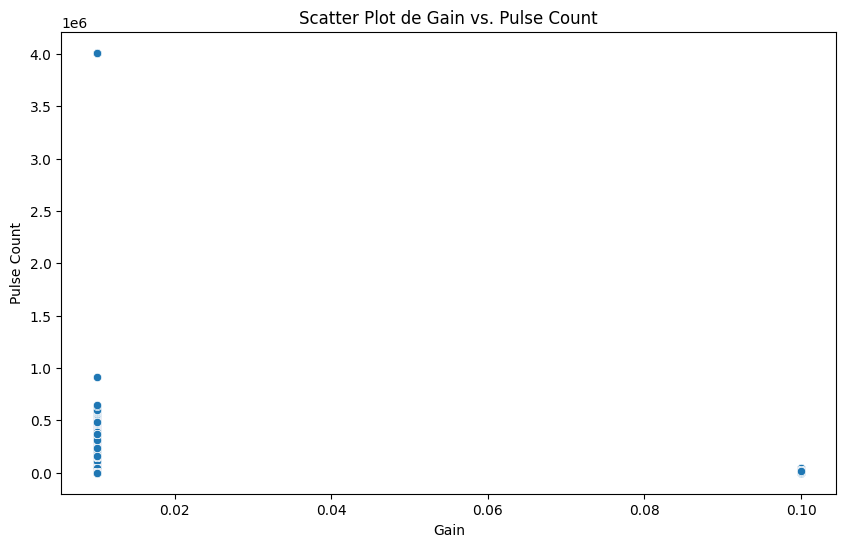

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="gain", y="pulseCount")
plt.title("Scatter Plot de Gain vs. Pulse Count")
plt.xlabel("Gain")
plt.ylabel("Pulse Count")
plt.show()

Gain aparenta só ter valores de 0.1 e 0.01


In [12]:
df["gain"].value_counts()

gain
0.01    1966995
0.10       9805
Name: count, dtype: int64

#### Scatter plot de meterIndex vs. pulseCount


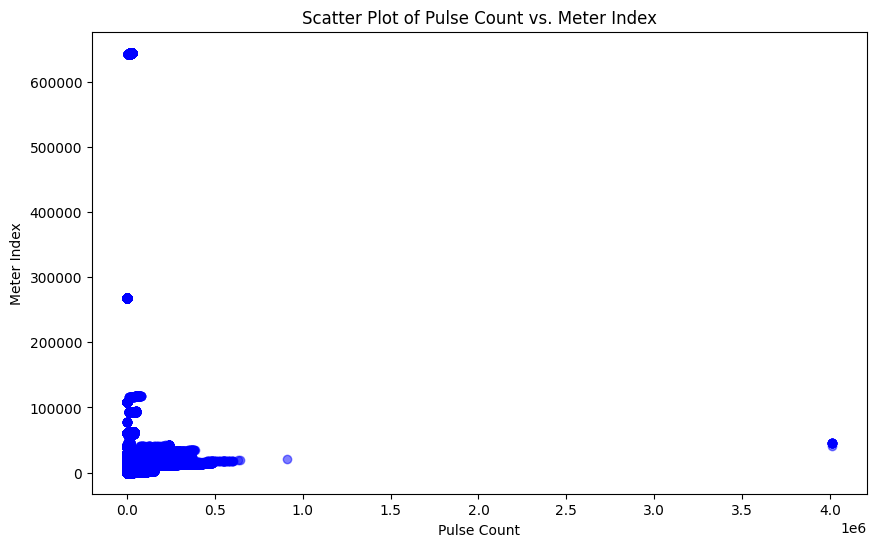

In [13]:
# Cria um gráfico de barras com a contagem de valores únicos da coluna 'gain'
plt.figure(figsize=(10, 6))
plt.scatter(df["pulseCount"], df["meterIndex"], alpha=0.5, color="blue")

# Adiciona título e rótulos aos eixos
plt.title("Scatter Plot of Pulse Count vs. Meter Index")
plt.xlabel("Pulse Count")
plt.ylabel("Meter Index")

# Exibe o gráfico
plt.show()

#### Histograma de pulseCount


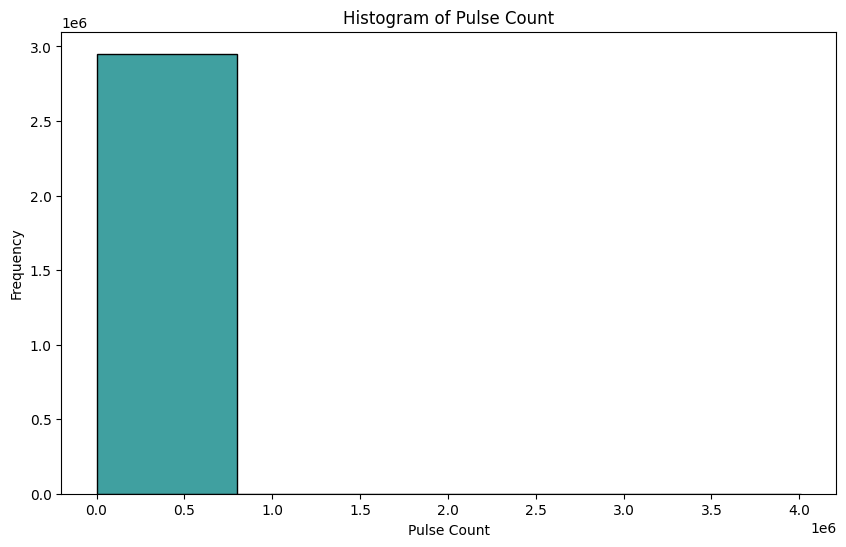

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df["pulseCount"], bins=5, kde=False, color="teal")
plt.title("Histogram of Pulse Count")
plt.xlabel("Pulse Count")
plt.ylabel("Frequency")
plt.show()

In [15]:
df["pulseCount"].describe().round(3)

count    2951243.000
mean        3696.606
std        18996.824
min            0.000
25%           46.120
50%          378.000
75%         2574.000
max      4010299.000
Name: pulseCount, dtype: float64

#### Histograma de todas as colunas numéricas


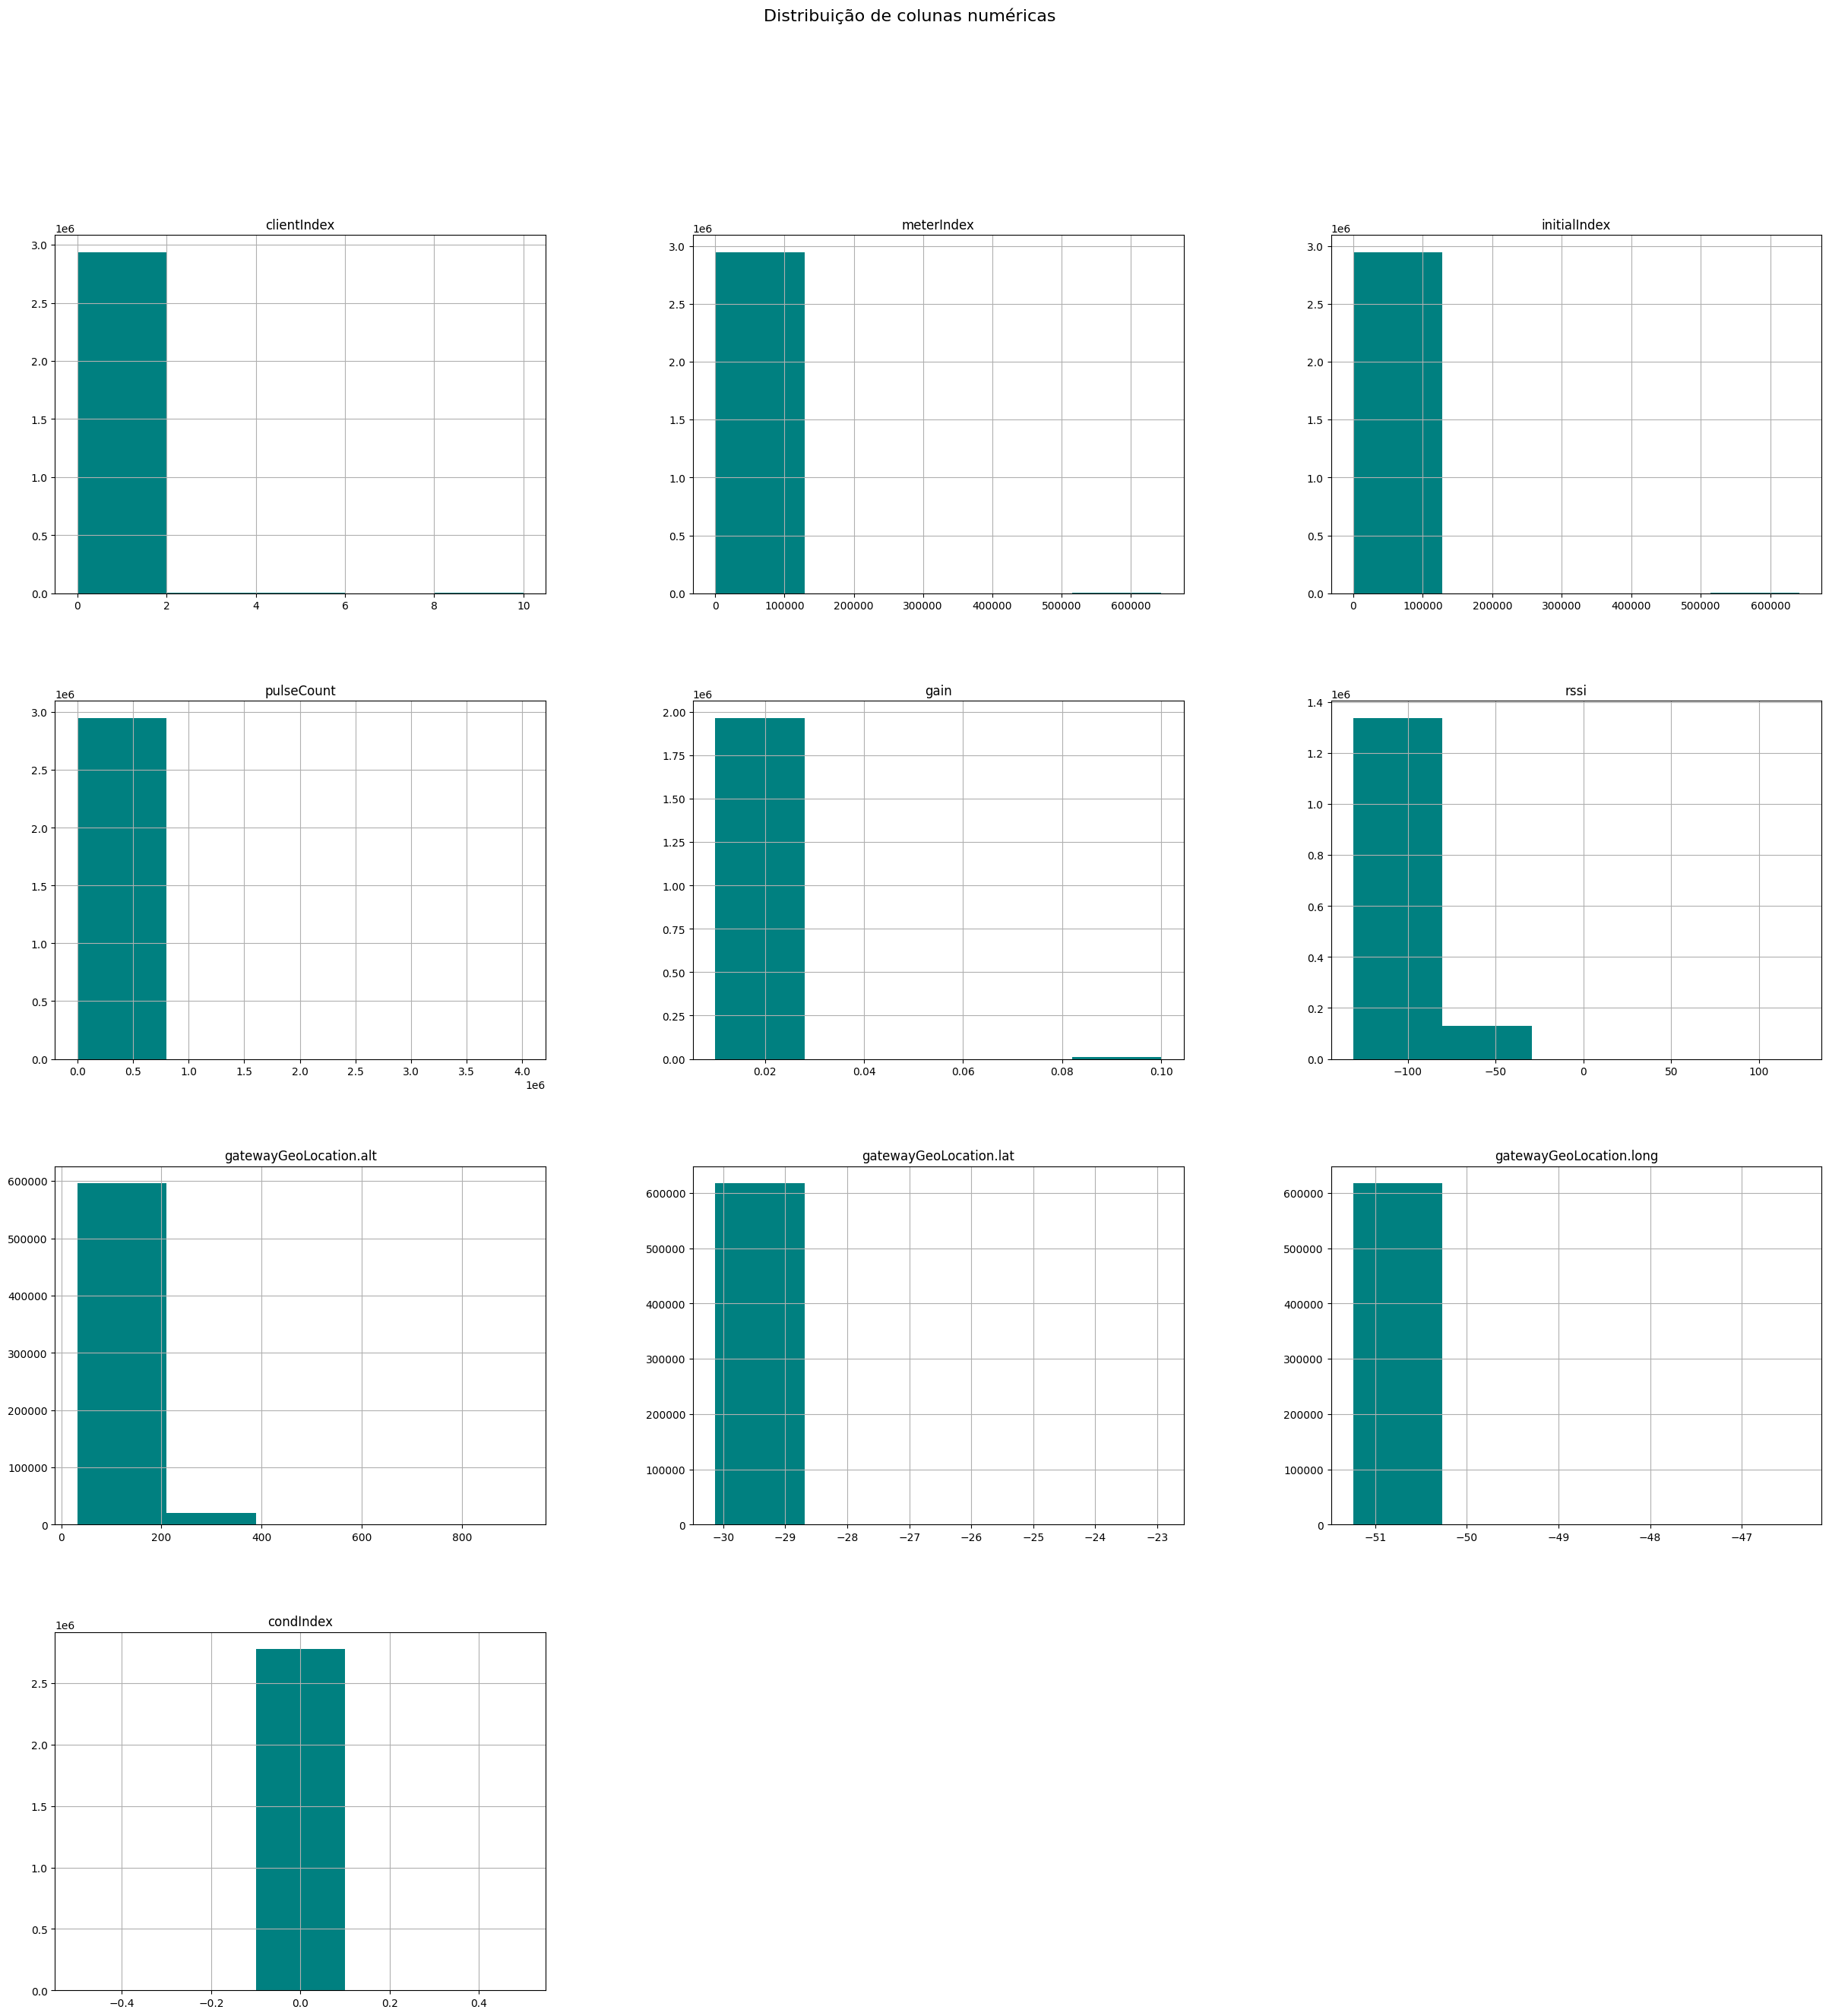

In [16]:
# Cria histogramas para todas as colunas numéricas
df.hist(bins=5, figsize=(30, 30), color="teal")
plt.suptitle("Distribuição de colunas numéricas", fontsize=16)
plt.show()

#### Gráfico de Regressão de pulseCount vs. rssi


In [17]:
# if generate_plots:
#     plt.figure(figsize=(10, 6))
#     sns.regplot(data=df, x='pulseCount', y='rssi', ci=95, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
#     plt.title('Gráfico de Regressão de pulseCount vs. RSSI')
#     plt.xlabel('Pulse Count')
#     plt.ylabel('RSSI')
#     plt.show()

#### Gráfico de regressão de pulseCount vs. meterIndex


In [18]:
# if generate_plots:
#     plt.figure(figsize=(10, 6))
#     sns.regplot(data=df, x='pulseCount', y='meterIndex', ci=95, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
#     plt.title('Gráfico de Regressão de pulseCount vs. meterIndex')
#     plt.xlabel('Pulse Count')
#     plt.ylabel('meterIndex')
#     plt.show()

## 4.2.2. Pré-processamento dos Dados

O pré-processamento dos dados envolve a limpeza e transformação das variáveis para preparar o conjunto de dados para a modelagem. Nesta seção, serão abordadas as seguintes etapas: tratamento de valores ausentes, identificação de outliers e criação de novas features.


### Transformação de Dados

Para melhorar a performance dos modelos preditivos, algumas variáveis foram transformadas. A seguir estão as transformações aplicadas:

- **Normalização**: A variável `gain` foi normalizada para reduzir o impacto de escalas diferentes entre as variáveis.
- **Transformação logarítmica**: Aplicada na variável `pulseCount` para lidar com a alta variabilidade e melhorar a distribuição dos dados.
- **Codificação de variáveis categóricas**: As variáveis `inputType` e `model` foram codificadas usando one-hot encoding para permitir que os modelos utilizem essas informações.


### Tratamento de valores nulos

De acordo com o gráfico de percentual de valores ausentes por coluna e a tabela de estatística descritiva, podemos concluir que os valores nulos nas colunas 'gain' e 'rssi', poderão ser substituidos por suas respectivas média, moda ou mediana, sem afetar significativamente qualquer análise.


#### Tratando o rssi


In [19]:
rssi_mean = df["rssi"].mean()  # Calcula a média da coluna rssi
rssi_mode = df["rssi"].mode()  # Calcula a moda da coluna rssi
rssi_median = df["rssi"].median()  # Calcula a mediana da coluna rssi

print(f"Média da coluna rssi: {rssi_mean:.2f}")
print(f"Moda da coluna rssi: {rssi_mode.values[0]:.2f}")
print(f"Mediana da coluna rssi: {rssi_median:.2f}")

Média da coluna rssi: -101.48
Moda da coluna rssi: -115.00
Mediana da coluna rssi: -105.00


In [20]:
df["rssi"] = df["rssi"].replace(
    np.nan, rssi_mean
)  # Substitui os valores nulos pela média da coluna rssi

#### Tratando o gain


In [21]:
df["gain"] = df["gain"].replace(
    np.nan, 1
)  # Substitui os valores nulos pela moda da coluna gain

### Variáveis Categóricos


#### Análise


In [22]:
print(categorical_features)

['datetime', 'inputType', 'model', 'cep', 'bairro', 'cidade', 'categoria', 'contratacao', 'situacao', 'perfil_consumo']


In [23]:
# Dicionário para armazenar a cardinalidade de cada feature categórica
cardinalities = {}

# Loop através de cada feature categórica, excluindo 'datetime'
for feature in categorical_features:
    if feature != "datetime":  # Exclui a coluna 'datetime'
        cardinality = len(df[feature].unique())
        cardinalities[feature] = cardinality

# Ordena o dicionário pela cardinalidade em ordem decrescente
sorted_cardinalities = dict(
    sorted(cardinalities.items(), key=lambda item: item[1], reverse=True)
)

# Imprime a cardinalidade de cada feature em ordem decrescente
for feature, cardinality in sorted_cardinalities.items():
    print(f"Feature: {feature}, Cardinalidade: {cardinality}")

Feature: contratacao, Cardinalidade: 107
Feature: cep, Cardinalidade: 82
Feature: bairro, Cardinalidade: 27
Feature: inputType, Cardinalidade: 9
Feature: cidade, Cardinalidade: 8
Feature: perfil_consumo, Cardinalidade: 8
Feature: categoria, Cardinalidade: 5
Feature: situacao, Cardinalidade: 4
Feature: model, Cardinalidade: 2


In [24]:
# Imprime a cardinalidade e os primeiros 10 valores únicos de cada feature em ordem decrescente
for feature in sorted_cardinalities:
    unique_values = df[feature].unique()
    cardinality = sorted_cardinalities[feature]

    print(f"Feature: {feature}")
    print(f"Cardinalidade: {cardinality}")
    print(f"Primeiros 10 Valores Únicos: {unique_values[:10]}\n")

Feature: contratacao
Cardinalidade: 107
Primeiros 10 Valores Únicos: ['2023-06-22' '2023-10-13' '2024-01-02' '2023-04-18' '2023-09-15'
 '2023-08-17' '2023-06-26' nan '2019-03-21' '2019-06-10']

Feature: cep
Cardinalidade: 82
Primeiros 10 Valores Únicos: ['90670-130' '90440-150' '90540-041' nan '90050-230' '90050-310'
 '90050-130' '90001-970' '90050-320' '90050-321']

Feature: bairro
Cardinalidade: 27
Primeiros 10 Valores Únicos: ['JARDIM BOTÂNICO' 'PETRÓPOLIS' 'AUXILIADORA' 'SÃO JOÃO' nan
 'CIDADE BAIXA' 'MENINO DEUS' 'MONT SERRAT' 'BOA VISTA' 'HIGIENÓPOLIS']

Feature: inputType
Cardinalidade: 9
Primeiros 10 Valores Únicos: ['DI1' 'DI4' 'DI3' 'DI2' 'DI8' 'DI7' 'DI6' 'DI5' 'leituraRemota']

Feature: cidade
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['PORTO ALEGRE' nan 'SÃO LEOPOLDO' 'SAO LEOPOLDO' 'NOVO HAMBURGO' 'CANOAS'
 'GRAVATAÍ' 'GRAVATAI']

Feature: perfil_consumo
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['Cocção + Aquecedor' nan 'Cocção + Caldeira' '-' 'Aquecedor' 'Cocção

In [25]:
df["perfil_consumo"].value_counts()  # Mostra os perfis de consumo

perfil_consumo
Cocção + Aquecedor              2545760
Cocção                           262445
-                                 15382
Aquecedor                          3157
Cocção + Caldeira                  2868
Caldeira                           2520
Cocção + Aquecedor + Piscina       2023
Name: count, dtype: int64

Percebe-se que, na verdade, há apenas 3 categorias em perfil de consumo: Aquecedor, Cocção, e Piscina.


Contratação, CEP e bairro possuem alta cardinalidades vamos ter que tratar de alguma forma diferente.

Para a contratação podemos criar uma feature de dias desde a contratação.

Para o CEP podemos remover o '-' e tratar como número, uma vez que números próximos de CEP possuem também proximidade geográfia (i.e. o CEP '22000-200' é mais próximo geográficamente de '23200-200' do que de '12200-200').
Já para o bairro


Para bairro podemos analisar o gráfico, parece fazer sentido pegar as 9 categorias mais frequentes (até Santa Cecília), pois com 1/3 da cardinalidade (9 comparado ao total de 27 bairros) corresponde a mais de 80% dos bairros.
Assim transformaremos os demais bairros em uma coluna de "outros".


#### Entedimento


As colunas apresentam baixa cardinalidade, a maior sendo 'inputType' com 9 categorias diferentes, e nenhuma sendo ordinal.
Assim usaremos OneHotEncoding (OHE) em todas elas (exceto 'perfil_consumo', 'CEP', 'bairro' e 'contratacao'), a fim de preservar ao máximo a informação contida nas variáveis.


No caso do perfil de consumo ('perfil_consumo'), é possível perceber que existem apenas 3 categorias reais (Aquecedor, Cocção e Piscina), assim criaremos 3 colunas binárias, onde 1 indicará que o cliente possui, mas não necessariamente de forma exclusiva, aquele perfil.


#### Codificação


In [26]:
# Criando df_encoded para preservar o df original
df_encoded = df.copy()

##### Transformação da data para o formato unix timestamp


In [27]:
df["datetime"] = pd.to_datetime(
    df["datetime"]
)  # Converte a coluna datetime para o formato datetime

df["timestamp"] = df["datetime"].apply(
    lambda x: x.timestamp() if pd.notnull(x) else None
)  # Cria uma nova coluna derivada da coluna datetime no DataFrame com os valores convertidos para timestamp, ignorando os valores nulos

##### Enconding Geral (OneHotEncoder)


In [28]:
# Remover as colunas que terão um tratamento diferente
ohe_categorical_cols = [
    col
    for col in categorical_features
    if col not in ["datetime", "perfil_consumo", "cep", "bairro", "contratacao"]
]

# Aplicar OneHotEncoder nas colunas selecionadas, mantendo o prefixo da variável original
df_encoded_ohe = pd.get_dummies(
    df_encoded[ohe_categorical_cols], prefix=ohe_categorical_cols
)

# Contar quantas colunas foram geradas no processo de One-Hot Encoding
num_new_columns = df_encoded_ohe.shape[1]
num_initial_columns = len(ohe_categorical_cols)
num_total_columns_before = df_encoded.shape[1]
num_total_columns_after = df_encoded.shape[1]

# Exibir informações detalhadas sobre o processo de codificação
print(f"Quantidade inicial de colunas categóricas codificadas: {num_initial_columns}")
print(f"Número de novas colunas geradas pelo One-Hot Encoding: {num_new_columns}")
print(f"Número total de colunas antes da codificação (df): {num_total_columns_before}")
print(
    f"Número total de colunas após a codificação (df_encoded): {num_total_columns_after}"
)


# Exibir as primeiras linhas das novas colunas geradas
print("\nVisualização das novas colunas geradas:")
print(df_encoded_ohe.head())

# Manter as colunas que não foram codificadas
df_remaining = df_encoded.drop(columns=ohe_categorical_cols)

# Concatenar as colunas codificadas com as restantes do DataFrame
df_encoded = pd.concat([df_remaining, df_encoded_ohe], axis=1)

# Verificação final: Exibir as primeiras linhas do DataFrame completo
print("Primeiras linhas do DataFrame completo com todas as colunas:")
print(df_encoded.head())

Quantidade inicial de colunas categóricas codificadas: 5
Número de novas colunas geradas pelo One-Hot Encoding: 25
Número total de colunas antes da codificação (df): 23
Número total de colunas após a codificação (df_encoded): 23

Visualização das novas colunas geradas:
   inputType_DI1  inputType_DI2  inputType_DI3  inputType_DI4  inputType_DI5  \
0           True          False          False          False          False   
1           True          False          False          False          False   
2           True          False          False          False          False   
3          False          False          False           True          False   
4          False          False          False           True          False   

   inputType_DI6  inputType_DI7  inputType_DI8  inputType_leituraRemota  \
0          False          False          False                    False   
1          False          False          False                    False   
2          False        

##### Encoding 'contratação'


In [29]:
# Calcular o número de valores NaN em 'contratacao'
num_nan_contratacao = df_encoded["contratacao"].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_nan_contratacao = (num_nan_contratacao / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'contratacao': {num_nan_contratacao}")
print(f"Percentual de valores NaN em 'contratacao': {percentual_nan_contratacao:.2f}%")

Número de valores NaN em 'contratacao': 117088
Percentual de valores NaN em 'contratacao': 3.97%


Para realizar o encoding de 'contratacao', vamos transformar a data de contratação em uma feature nova: número de dias desde a contrataçao ('dias_desde_contratacao'), tendo como data de referência o último dado disponível na base de dados, e tratando-a como 'int' daqui pra frente.

Depois, iremos inputar os dados nulos pela mediana e criar uma coluna binária 'contratacao_isnan' que persiste a inforamção de quais linhas eram nulas nessa coluna.


In [30]:
# Converter as colunas 'contratacao' e 'datetime' para formato datetime
df_encoded["contratacao"] = pd.to_datetime(df_encoded["contratacao"], errors="coerce")
df_encoded["datetime"] = pd.to_datetime(df_encoded["datetime"], errors="coerce")

# Encontrar o último dia de contratação (ignorando NaNs)
ultimo_dia_contratacao = df_encoded["contratacao"].max()

# Encontrar o último timestamp (ignorando NaNs)
ultimo_timestamp = df_encoded["datetime"].max()

# Exibir as datas encontradas
print(f"Último dia de contratação: {ultimo_dia_contratacao}")
print(f"Último datetime: {ultimo_timestamp}")

Último dia de contratação: 2024-04-30 00:00:00
Último datetime: 2024-06-30 23:59:54


Vamos usar o último 'datetime' (variável 'ultimo_timestamp') como data de referência para nossa feature!


In [31]:
# Passo 1: Converter a coluna 'contratacao' para o formato datetime
df_encoded["contratacao"] = pd.to_datetime(df_encoded["contratacao"], errors="coerce")

# Passo 2: Calcular o número de dias até a data de referência
data_referencia = ultimo_timestamp  # Último timestamp encontrado
df_encoded["dias_ate_referencia"] = (
    data_referencia - df_encoded["contratacao"]
).dt.days

# Passo 3: Criar a coluna binária 'contratacao_nan' para indicar valores NaN originais
df_encoded["contratacao_nan"] = df_encoded["dias_ate_referencia"].isna().astype(int)

# Passo 4: Substituir os valores NaN pela mediana
mediana_dias = df_encoded["dias_ate_referencia"].median()
df_encoded["dias_ate_referencia"] = df_encoded["dias_ate_referencia"].fillna(
    mediana_dias
)

# Verificar a nova feature e a coluna binária
print(df_encoded[["contratacao", "dias_ate_referencia", "contratacao_nan"]].head())

# Remover a coluna original 'contratacao'
df_encoded.drop(columns=["contratacao"], inplace=True)

# Contar o número de valores 1 na coluna 'contratacao_nan'
num_contratacao_nan_ones = df_encoded["contratacao_nan"].sum()
print(f"\nNúmero de valores 1 na coluna 'contratacao_nan': {num_contratacao_nan_ones}")
print(
    f"Percentual de valores NaN em 'contratacao_nan': {num_contratacao_nan_ones/len(df_encoded):.2%}"
)

  contratacao  dias_ate_referencia  contratacao_nan
0  2023-06-22                374.0                0
1  2023-06-22                374.0                0
2  2023-06-22                374.0                0
3  2023-06-22                374.0                0
4  2023-06-22                374.0                0

Número de valores 1 na coluna 'contratacao_nan': 117088
Percentual de valores NaN em 'contratacao_nan': 3.97%


##### Encoding 'cep'


In [32]:
# Calcular o número de valores NaN em 'cep'
num_nan_cep = df_encoded["cep"].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_num_nan_cep = (num_nan_cep / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'cep' pré-encoding: {num_nan_cep}")
print(f"Percentual de valores NaN em 'cep' pré-encoding: {percentual_num_nan_cep:.2f}%")

Número de valores NaN em 'cep' pré-encoding: 117088
Percentual de valores NaN em 'cep' pré-encoding: 3.97%


Para 'cep' vamos substituir os valores 'nan' por 0, após isso retirar o hífen e tratar os valores como 'int', conforme a explicação na seção de entendimento.


In [33]:
# Passo 1: Remover hífens e espaços em branco do CEP
df_encoded["cep_cleaned"] = df_encoded["cep"].str.replace("-", "").str.strip()

# Passo 2: Substituir strings vazias ou espaços em branco por NaN
df_encoded["cep_cleaned"] = df_encoded["cep_cleaned"].replace("", float("nan"))

# Passo 3: Substituir NaNs por um valor adequado, por exemplo, 0
df_encoded["cep_cleaned"] = df_encoded["cep_cleaned"].fillna("0")

# Passo 4: Converter a coluna limpa para inteiro
df_encoded["cep"] = df_encoded["cep_cleaned"].astype(int)

# Passo 5: Remover a coluna 'cep_cleaned'
df_encoded = df_encoded.drop(columns=["cep_cleaned"])

# Verificar as primeiras linhas para garantir que a conversão foi bem-sucedida
print(df_encoded["cep"].value_counts())

cep
94035330    348372
90035190    266360
90420180    234037
90050102    219001
90830180    218027
             ...  
90020004       172
90030131       158
90010320       144
90010272        31
90010030        20
Name: count, Length: 77, dtype: int64


In [34]:
# Contar o número de ocorrências onde o CEP é igual a 0
count_cep_zero = (df_encoded["cep"] == 0).sum()

# Calcular o percentual que isso representa em relação ao total de linhas
percent_cep_zero = (count_cep_zero / len(df_encoded)) * 100

print(f"Contagem de valores onde o CEP é igual a 0 pós-encoding: {count_cep_zero}")
print(
    f"Percentual de valores onde o CEP é igual a 0 pós-encoding: {percent_cep_zero:.2f}%"
)

print(f"\nNúmero de valores NaN em 'cep' pré-encoding: {num_nan_cep}")
print(f"Percentual de valores NaN em 'cep' pré-encoding: {percentual_num_nan_cep:.2f}%")

Contagem de valores onde o CEP é igual a 0 pós-encoding: 119018
Percentual de valores onde o CEP é igual a 0 pós-encoding: 4.03%

Número de valores NaN em 'cep' pré-encoding: 117088
Percentual de valores NaN em 'cep' pré-encoding: 3.97%


Realizamos o encoding, mas algo não parece certo... apareceram cerca de 2 mil linhas a mais como zero em relação ao número de NaNs inicial em 'cep'.

Vamos investigar:


In [35]:
# Remover espaços em branco e verificar se os valores são apenas '-' ou strings vazias após o strip
df["cep_cleaned"] = df["cep"].str.strip()

# Contar o número de ocorrências onde o CEP é apenas '-' ou uma string vazia
count_hyphen_or_empty = ((df["cep_cleaned"] == "-") | (df["cep_cleaned"] == "")).sum()

print(
    f"Número de linhas em df onde o CEP é apenas '-' ou uma string vazia após o strip: {count_hyphen_or_empty}"
)
print(f"Diferença não explicada pré e pós encoding: {count_cep_zero - num_nan_cep}")

Número de linhas em df onde o CEP é apenas '-' ou uma string vazia após o strip: 1930
Diferença não explicada pré e pós encoding: 1930


Conseguimos justificar. Os casos eram preenchimentos que estavam somente com espaços ou hífen, assim, após o 'strip()' (que remove espaços) podemos ver que eram, na verdade, células não-preenchidas.

Podemos remover o df['cep_cleand'] agora.


In [36]:
df = df.drop(columns="cep_cleaned")

##### Encoding 'bairro'


In [37]:
df_encoded["bairro"].value_counts()

bairro
CENTRO              495998
JARDIM BOTÂNICO     349416
BOM FIM             294862
RIO BRANCO          253296
CIDADE BAIXA        227235
NONOAI              218027
MONT SERRAT         208410
BOA VISTA           163164
SANTA CECÍLIA       139240
CRISTAL             123159
PETRÓPOLIS           65929
SÃO JOÃO             46010
PASSO DA AREIA       44971
AUXILIADORA          42928
BELA VISTA           42514
CENTRO HISTÓRICO     39401
MENINO DEUS          24342
CRISTO REDENTOR      24273
MOINHOS DE VENTO      9688
JARDIM DO SALSO       9197
HIGIENÓPOLIS          6382
PASSO D'AREIA         2281
SARANDI               1307
INDEPENDÊNCIA         1009
TRÊS FIGUEIRAS         579
TRISTEZA               537
Name: count, dtype: int64

In [38]:
# Calcular o número de valores NaN em 'bairro'
num_nan_bairro = df_encoded["bairro"].isna().sum()

# Calcular o percentual de NaN em relação ao número total de linhas
percentual_num_nan_bairro = (num_nan_bairro / len(df_encoded)) * 100

# Exibir os resultados
print(f"Número de valores NaN em 'bairro' pré-encoding: {num_nan_bairro}")
print(
    f"Percentual de valores NaN em 'bairro' pré-encoding: {percentual_num_nan_bairro:.2f}%"
)

Número de valores NaN em 'bairro' pré-encoding: 117088
Percentual de valores NaN em 'bairro' pré-encoding: 3.97%


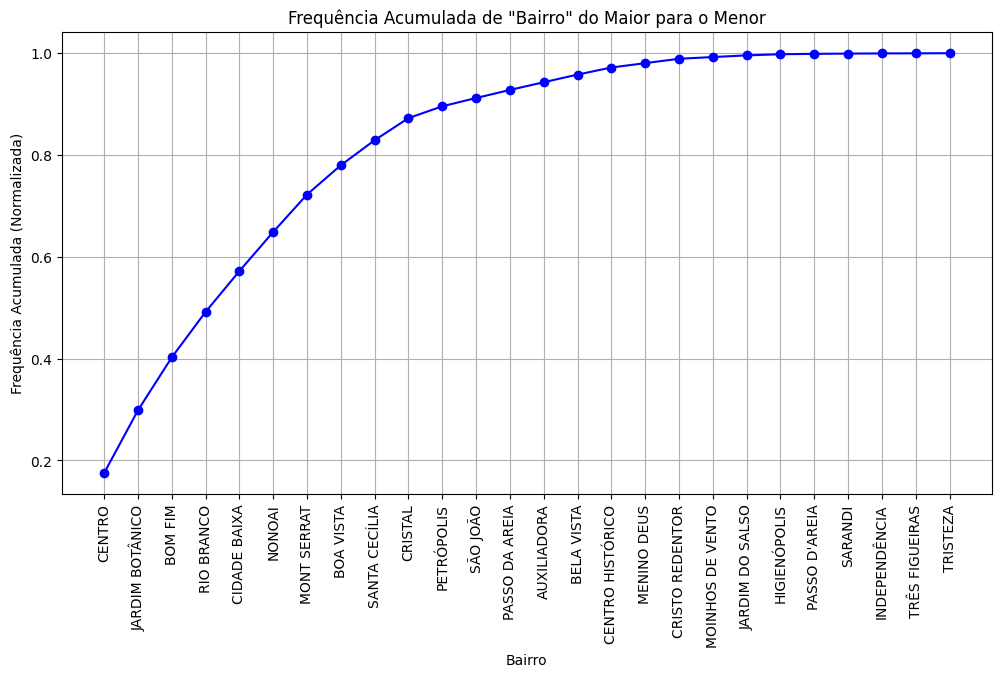

In [39]:
# Passo 1: Calcular a frequência de cada categoria na coluna 'bairro' e ordenar
frequencia_bairro = df_encoded["bairro"].value_counts().sort_values(ascending=False)

# Calcular a frequência acumulada
frequencia_acumulada = frequencia_bairro.cumsum()

# Normalizar a frequência acumulada para obter a proporção (entre 0 e 1)
frequencia_acumulada = frequencia_acumulada / frequencia_acumulada.max()

# Passo 2: Plotar a frequência acumulada
plt.figure(figsize=(12, 6))
plt.plot(frequencia_acumulada, marker="o", linestyle="-", color="b")
plt.title('Frequência Acumulada de "Bairro" do Maior para o Menor')
plt.xlabel("Bairro")
plt.ylabel("Frequência Acumulada (Normalizada)")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Para bairro podemos analisar o gráfico, parece fazer sentido pegar as 9 categorias mais frequentes (até Santa Cecília), pois com 1/3 da cardinalidade (9 comparado ao total de 27 bairros) corresponde a mais de 80% dos bairros.
Assim transformaremos os demais bairros em uma coluna de "outros".


In [40]:
# Obter os 9 principais bairros
top_9_bairros = frequencia_bairro.head(9).index

# Passo 2: Substituir os bairros que não estão entre os 9 principais por "Outros"
df_encoded["bairro"] = df_encoded["bairro"].apply(
    lambda x: x if x in top_9_bairros else "Outros"
)

# Passo 3: Verificar o resultado
print(df_encoded["bairro"].value_counts())

bairro
Outros             601595
CENTRO             495998
JARDIM BOTÂNICO    349416
BOM FIM            294862
RIO BRANCO         253296
CIDADE BAIXA       227235
NONOAI             218027
MONT SERRAT        208410
BOA VISTA          163164
SANTA CECÍLIA      139240
Name: count, dtype: int64


In [41]:
# Contar o número de ocorrências de "Outros"
outros_count = df_encoded["bairro"].value_counts()["Outros"]

# Contar o total de registros
total_count = len(df_encoded)

# Calcular o percentual de "Outros" em relação ao total
percent_outros = (outros_count / total_count) * 100

# Imprimir o resultado
print(f"Número de registros como 'Outros': {outros_count}")
print(f"Percentual de 'Outros' em relação ao total: {percent_outros:.2f}%")

Número de registros como 'Outros': 601595
Percentual de 'Outros' em relação ao total: 20.38%


'Outros' é 20% dos casos, como queríamos, a diferença em relação ao gráfico é por causa dos 3.97% de casos nulos. Esses casos não serão 'True' (1) em nenhuma das colunas binárias após o OHE, assim, preservaremos a informação de queram nulos.


Agora só precisamos fazer o OHE das categorias restantes:


In [42]:
# Passo 1: Aplicar o One-Hot Encoding na coluna 'bairro'
bairro_dummies = pd.get_dummies(df_encoded["bairro"], prefix="bairro")

# Passo 2: Remover a coluna original 'bairro'
df_encoded = df_encoded.drop(columns=["bairro"])

# Passo 3: Adicionar as colunas codificadas ao DataFrame original
df_encoded = pd.concat([df_encoded, bairro_dummies], axis=1)

In [43]:
# Vamos exibir todas as colunas que começam com 'bairro_' para ver como ficou a codificação
print(f"Número de Colunas: {len(df_encoded.filter(like='bairro_').columns)}")
print(f"Colunas: {df_encoded.filter(like='bairro_').columns}")

Número de Colunas: 10
Colunas: Index(['bairro_BOA VISTA', 'bairro_BOM FIM', 'bairro_CENTRO',
       'bairro_CIDADE BAIXA', 'bairro_JARDIM BOTÂNICO', 'bairro_MONT SERRAT',
       'bairro_NONOAI', 'bairro_Outros', 'bairro_RIO BRANCO',
       'bairro_SANTA CECÍLIA'],
      dtype='object')


In [44]:
# Contar quantas colunas foram geradas no processo de One-Hot Encoding
num_total_columns_before = df_encoded.shape[1]
num_total_columns_after = df_encoded.shape[1]

# Exibir informações detalhadas sobre o processo de codificação
print(f"Número total de colunas antes da codificação (df): {num_total_columns_before}")
print(
    f"Número total de colunas após a codificação (df_encoded): {num_total_columns_after}"
)

Número total de colunas antes da codificação (df): 53
Número total de colunas após a codificação (df_encoded): 53


##### Encoding 'perfil_consumo'


Relembrando as categorias de 'perfil_consumo'


In [45]:
feature = "perfil_consumo"
unique_values = df_encoded[feature].unique()
cardinality = sorted_cardinalities[feature]

print(f"Feature: {feature}")
print(f"Cardinalidade: {cardinality}")
print(f"Primeiros 10 Valores Únicos: {unique_values[:10]}\n")

Feature: perfil_consumo
Cardinalidade: 8
Primeiros 10 Valores Únicos: ['Cocção + Aquecedor' nan 'Cocção + Caldeira' '-' 'Aquecedor' 'Cocção'
 'Caldeira' 'Cocção + Aquecedor + Piscina']



In [46]:
# Passo 1: Criar as colunas binárias para cada perfil de consumo
df_encoded["perfil_aquecedor"] = df_encoded["perfil_consumo"].apply(
    lambda x: 1 if "Aquecedor" in str(x) else 0
)
df_encoded["perfil_coccao"] = df_encoded["perfil_consumo"].apply(
    lambda x: 1 if "Cocção" in str(x) else 0
)
df_encoded["perfil_piscina"] = df_encoded["perfil_consumo"].apply(
    lambda x: 1 if "Piscina" in str(x) else 0
)

# Passo 2: Verificar o resultado
print(
    df_encoded[
        ["perfil_consumo", "perfil_aquecedor", "perfil_coccao", "perfil_piscina"]
    ].sample(20)
)

# Passo 3: Remover a coluna original 'perfil_consumo'
df_encoded = df_encoded.drop(columns=["perfil_consumo"])

             perfil_consumo  perfil_aquecedor  perfil_coccao  perfil_piscina
316921   Cocção + Aquecedor                 1              1               0
1488853  Cocção + Aquecedor                 1              1               0
1720404  Cocção + Aquecedor                 1              1               0
2923283  Cocção + Aquecedor                 1              1               0
1799362  Cocção + Aquecedor                 1              1               0
988834                  NaN                 0              0               0
362250   Cocção + Aquecedor                 1              1               0
870051   Cocção + Aquecedor                 1              1               0
525375   Cocção + Aquecedor                 1              1               0
1807133  Cocção + Aquecedor                 1              1               0
871558   Cocção + Aquecedor                 1              1               0
216556   Cocção + Aquecedor                 1              1               0

Nota: não precisamos alterar os valores 'nan' ou '-', vistos nos valores únicos printados acima, porque esses valores serão codificados como 'False' nas 3 colunas binárias criadas para 'perfil_consumo'.


In [47]:
# Calcular os percentuais de True (1) em cada coluna de perfil
percentuais_perfil = (
    df_encoded[["perfil_aquecedor", "perfil_coccao", "perfil_piscina"]].mean() * 100
)

# Exibir os percentuais
print("Percentuais de True (1) em cada coluna de perfil:")
print(percentuais_perfil)

# Filtrar os casos onde todos os 3 perfis são False (0)
casos_sem_perfil = df_encoded[
    (df_encoded["perfil_aquecedor"] == 0)
    & (df_encoded["perfil_coccao"] == 0)
    & (df_encoded["perfil_piscina"] == 0)
]

# Calcular e exibir o percentual de casos onde todos os perfis são False
percentual_sem_perfil = (casos_sem_perfil.shape[0] / len(df_encoded)) * 100
print(
    f"\nPercentual de casos onde todos os perfis são False (0): {percentual_sem_perfil:.2f}%"
)

Percentuais de True (1) em cada coluna de perfil:
perfil_aquecedor    86.436122
perfil_coccao       95.319023
perfil_piscina       0.068547
dtype: float64

Percentual de casos onde todos os perfis são False (0): 4.57%


### Variáveis Numéricas


#### Análise


In [48]:
df_encoded[numerical_features].describe().apply(
    lambda x: x.apply("{:.2f}".format)
)  # Mostra as estatisticas descritivas das colunas numéricas

,meterIndex,initialIndex,pulseCount,gain,rssi,gatewayGeoLocation.alt,gatewayGeoLocation.lat,gatewayGeoLocation.long
count,2951243.00,2951243.00,2951243.00,2951243.00,2951243.00,618081.00,618081.00,618081.00
mean,1387.27,1324.94,3696.61,0.34,-101.48,96.69,-30.02,-51.20
std,21438.47,21359.00,18996.82,0.47,9.72,59.80,0.27,0.19
min,-89.00,-89.00,0.00,0.01,-131.00,32.00,-30.13,-51.24
25%,10.53,0.00,46.12,0.01,-105.00,65.00,-30.09,-51.23
50%,35.09,2.87,378.00,0.01,-101.48,91.00,-30.03,-51.23
75%,90.30,19.41,2574.00,1.00,-101.48,103.00,-30.03,-51.19
max,644396.63,641554.33,4010299.00,1.00,123.00,923.00,-22.94,-46.37


In [49]:
# Obtenha as estatísticas descritivas
stats = df_encoded[numerical_features].describe()

# Calcule a razão do desvio-padrão sobre a média para cada coluna numérica
std_dev_to_mean_ratio = stats.loc["std"] / stats.loc["mean"]

print(std_dev_to_mean_ratio)

meterIndex                 15.453744
initialIndex               16.120766
pulseCount                  5.138991
gain                        1.380263
rssi                       -0.095768
gatewayGeoLocation.alt      0.618449
gatewayGeoLocation.lat     -0.009142
gatewayGeoLocation.long    -0.003748
dtype: float64


Podemos notar que das variáveis numéricas iniciais (antes da codificação das variáveis categóricas) a 'pulseCount' se sobressai pelo seu alto desvio-padrão, por isso aplicaremos uma transformação logarítmica.


#### Codificação


##### Transformação logarítmica da coluna pulseCount


In [50]:
# Aplica a transformação logarítmica na coluna pulseCount e salvar no df_encoded
df_encoded["log_pulseCount"] = np.log1p(
    df_encoded["pulseCount"]
)  # Aplica a transformação logarítmica na coluna pulseCount

# Verifica algumas linhas aleatórias para garantir que a transformação foi bem-sucedida
print(df_encoded[["pulseCount", "log_pulseCount"]].sample(10))

         pulseCount  log_pulseCount
2141234      495.00        6.206576
2015551      125.86        4.843084
991801       326.00        5.789960
193593         2.00        1.098612
140700         0.86        0.620576
476337      1256.00        7.136483
1891396     1354.00        7.211557
952505      9821.00        9.192380
1973070     1056.00        6.963190
36302       1216.00        7.104144


##### Normalização da Variável Gain


In [52]:
# Normalização da variável gain
df_encoded["gain"] = (df_encoded["gain"] - df_encoded["gain"].mean()) / df_encoded[
    "gain"
].std()

#### Entendimento


In [53]:
# Obtém os tipos de dados das colunas
dtypes = df_encoded.dtypes

# Cria listas de colunas com base no dtype
object_cols = [col for col in dtypes.index if dtypes[col] == "object"]
non_object_cols = [col for col in dtypes.index if dtypes[col] != "object"]

# Cria a lista de colunas ordenada
sorted_cols = object_cols + non_object_cols

# Reordena o DataFrame conforme a lista ordenada
df_sorted = df_encoded[sorted_cols]

print("Informações do dataframe codificado (df_encoded) ordenado pelo data type:\n")
print(df_sorted.info())

Informações do dataframe codificado (df_encoded) ordenado pelo data type:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951243 entries, 0 to 2951242
Data columns (total 56 columns):
 #   Column                                  Dtype         
---  ------                                  -----         
 0   clientCode                              object        
 1   meterSN                                 object        
 2   condCode                                object        
 3   clientIndex                             int64         
 4   meterIndex                              float64       
 5   initialIndex                            float64       
 6   pulseCount                              float64       
 7   gain                                    float64       
 8   datetime                                datetime64[ns]
 9   rssi                                    float64       
 10  gatewayGeoLocation.alt                  float64       
 11  gatewayGeoLocation.lat     

Podemos notar que as únicas colunas que não são númericas são as colunas identificadores ('id_features'), assim nossa codificação está completa!

Nota: poderíamos utilizar um escalador (como o MinMaxScaler do Sklearn) nas colunas a partir de agora, mas escolhemos preservar a escala dos dados para manter a interpretabilidade e evitar limitações para a próxima etapa de feature engineering e criação de modelos.


In [54]:
print(id_features)

['clientCode', 'clientIndex', 'condCode', 'condIndex', 'meterSN']


### Tratamento de Outliers


Neste projeto, os outliers não serão removidos, pois o foco é identificar anomalias no consumo de gás. Em vez disso, estamos tratando os outliers como casos de interesse que precisam ser analisados e modelados adequadamente. A seguir, são apresentadas as técnicas utilizadas para a detecção e análise desses outliers.


##### Visualização de Outliers


In [55]:
# Visualização dos outliers em meterIndex e pulseCount
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=df[['meterIndex', 'pulseCount']])
# plt.title('Visualização dos Outliers em meterIndex e pulseCount')
# plt.show()

## 4.3. Preparação dos Dados e Modelagem

Nesta seção, será criada a primeira versão do modelo preditivo, as escolhas de features e resultados serão explicados e analisados.

### 4.3.1. Modelo Não-Supervisionado - Modelagem, features e explicação

*Hipotese inicial*
Partimos da premissa de que dispúnhamos de uma quantidade suficiente de CEPs para realizar comparações significativas. Acreditávamos que indivíduos que moram próximos uns dos outros apresentariam padrões de consumo semelhantes. Nossa abordagem consistia em avaliar a variação da taxa de consumo ao longo de uma semana e, em seguida, comparar esses dados com indivíduos agrupados em clusters específicos.

No entanto, enfrentamos um problema: a quantidade de CEPs disponível não foi suficiente para realizar uma análise robusta. Como resultado, não conseguimos formar clusters que fossem suficientemente representativos para validar nossa hipótese.

*Nova Abordagem:*

Dado que decidimos não seguir com a hipótese inicial, adotamos uma nova estratégia para análise. Nossa abordagem agora foca na comparação entre o consumo individual e o comportamento médio/mediano da residência por dia da semana. A seguir, detalhamos os principais passos e considerações:

Análise Residência vs. Indivíduo por Dia da Semana:

O consumo de cada indivíduo será comparado com a média ou mediana de consumo do prédio (condomínio) onde reside.
A partir dessa comparação, os resultados entre os indivíduos serão agregados e comparados com a média ou mediana do consumo de cada agrupamento (condIndex).
A renda per capita, inferida pelo condCode, também será considerada como um fator influente.
Cada grupo de indivíduos dentro de um mesmo condomínio (condCode) será tratado como um cluster. No entanto, é importante notar que nem todos os consumidores estão vinculados a um condomínio.


Justificativa da Escolha das Features:

pulseCount (Contagem de Pulsos):
Esta feature é fundamental, pois representa a base do cálculo de consumo de gás. Cada pulso captado pelo medidor está diretamente relacionado à quantidade de gás consumida. É essencial para medir o consumo de cada cliente de forma precisa e granular.

gain (Fator de Multiplicação de Pulsos):
O fator de multiplicação de pulsos é necessário para converter a contagem de pulsos em uma unidade mais prática, como metros cúbicos de gás. Essa feature garante que os dados de consumo sejam interpretados corretamente, considerando possíveis diferenças entre medidores.

condCode (Código do Condomínio):
Essa feature permite identificar e agrupar consumidores que residem em um mesmo condomínio. A análise por agrupamentos, como clusters de consumidores que compartilham o mesmo condCode, facilita a identificação de padrões coletivos e anomalias que podem ser específicas de um determinado condomínio.

clientIndex (Identificador Único):
O clientIndex é essencial para diferenciar os consumidores individuais. Ele garante que cada unidade de medição seja tratada de forma única, permitindo análises individualizadas mesmo dentro de agrupamentos maiores, como os de condomínio.

*pulseCount será multiplicado pelo Gain*



Análise Comparativa:

Pontos Positivos:
Possibilita a identificação de padrões de consumo anômalos com base no comportamento diário.
Facilita a segmentação dos consumidores em clusters específicos, como os agrupados por condomínio, com base no consumo diário.
Pontos Negativos:
Medições coletivas podem influenciar os dados, dificultando a análise individual.
A limitação de informações específicas por condomínio pode restringir a precisão da formação dos clusters.


*Início do desenvolvimento da abordagem:*

Criação da coluna totalConsumption


In [56]:
df["totalConsumption"] = df.pulseCount * df.gain

Abaixo faremos a validação da hipotese de se é proveitoso ou não agrupar os clusters por condomínio.


Contagem de quem mais aparece na coluna condCode.



In [58]:
condCodeValues = df["condCode"].value_counts()
condCodeValues

Pegando o condomínio que mais aparece.


In [59]:
targetCondCode = condCodeValues.index[0]
print(targetCondCode)

Criando o targetCondCodeDf, contendo valores somente desse condomínio que mais aparece.


In [61]:
targetCondCodeDf = df[df["condCode"] == targetCondCode]
targetCondCodeDf

,clientCode,clientIndex,meterIndex,initialIndex,pulseCount,gain,datetime,meterSN,inputType,model,...,bairro,cidade,categoria,contratacao,situacao,perfil_consumo,condCode,condIndex,timestamp,totalConsumption
20776,6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...,0,3.47,3.447,2.0,0.01,2024-02-10 01:01:48,030C6423DA60,DI1,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707527e+09,0.02
20777,6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...,0,3.47,3.447,2.0,0.01,2024-02-10 06:10:07,030C6423DA60,DI1,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707545e+09,0.02
20778,6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...,0,3.47,3.447,2.0,0.01,2024-02-10 07:12:30,030C6423DA60,DI1,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707549e+09,0.02
20779,6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...,0,3.47,3.447,2.0,0.01,2024-02-10 09:16:27,030C6423DA60,DI1,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707557e+09,0.02
20780,6ce6497ae0f296fcd9b8c30999041e00a13a41406d7b05...,0,3.47,3.447,2.0,0.01,2024-02-10 12:21:04,030C6423DA60,DI1,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707568e+09,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950914,ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...,0,21.14,6.300,1484.0,0.01,2024-06-30 18:00:19,4D700AC40362,DI3,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719770e+09,14.84
2950915,ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...,0,21.14,6.300,1484.0,0.01,2024-06-30 20:05:25,4D700AC40362,DI3,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719778e+09,14.84
2950916,ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...,0,21.14,6.300,1484.0,0.01,2024-06-30 21:07:40,4D700AC40362,DI3,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719782e+09,14.84
2950917,ee1d6fb0927c61d02197a3d1b4a628ba71d6ded9abbb36...,0,21.14,6.300,1484.0,0.01,2024-06-30 22:10:58,4D700AC40362,DI3,IG1K-L-v2,...,BOM FIM,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719785e+09,14.84


*Criando a coluna measure diff:*

A coluna foi criada organizando o df em ordem crescente, primeiro pelo clientCode depois pelo datetime. depois foi criada uma coluna auxiliar, que depois foi removida, chamada 'match', com valores True se a linha n-1 for do mesmo cliente que a linha n. Se a coluna match for true, a coluna measure_diff calcula a diferença de total consumption da linha n para a linha n-1.


In [62]:
targetCondCodeDf = targetCondCodeDf.sort_values(
    by=["clientCode", "datetime"], ascending=True
)
targetCondCodeDf["match"] = df.clientCode.eq(df.clientCode.shift())
targetCondCodeDf["measure_diff"] = targetCondCodeDf["match"].where(
    targetCondCodeDf["match"] == False, targetCondCodeDf["totalConsumption"].diff()
)
targetCondCodeDf["measure_diff"] = pd.to_numeric(
    targetCondCodeDf["measure_diff"], errors="coerce"
)
targetCondCodeDf = targetCondCodeDf.dropna(subset=["match"])
targetCondCodeDf = targetCondCodeDf.drop(columns=["match"])
targetCondCodeDf.reset_index(drop=True, inplace=True)
targetCondCodeDf

,clientCode,clientIndex,meterIndex,initialIndex,pulseCount,gain,datetime,meterSN,inputType,model,...,cidade,categoria,contratacao,situacao,perfil_consumo,condCode,condIndex,timestamp,totalConsumption,measure_diff
0,008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...,0,2.02,2.022,0.0,0.01,2024-02-08 18:27:39,3C2D5A000067,DI5,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707417e+09,0.00,0.00
1,008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...,0,2.02,2.022,0.0,0.01,2024-02-08 21:33:43,3C2D5A000067,DI5,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707428e+09,0.00,0.00
2,008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...,0,2.02,2.022,0.0,0.01,2024-02-09 03:44:05,3C2D5A000067,DI5,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707450e+09,0.00,0.00
3,008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...,0,2.02,2.022,0.0,0.01,2024-02-09 05:45:15,3C2D5A000067,DI5,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707458e+09,0.00,0.00
4,008fe9801fb4400b223dcaf0d3cf96d13a6504c7a85bd5...,0,2.02,2.022,0.0,0.01,2024-02-09 08:48:41,3C2D5A000067,DI5,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.707469e+09,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268285,ff47c607f523998d1dc911033697a6bd33d09a34749ecd...,0,17.21,3.333,1388.0,0.01,2024-06-30 12:03:03,1030ca76052d,DI1,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719749e+09,13.88,0.00
268286,ff47c607f523998d1dc911033697a6bd33d09a34749ecd...,0,17.21,3.333,1388.0,0.01,2024-06-30 15:06:25,1030ca76052d,DI1,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719760e+09,13.88,0.00
268287,ff47c607f523998d1dc911033697a6bd33d09a34749ecd...,0,17.21,3.333,1388.0,0.01,2024-06-30 16:07:15,1030ca76052d,DI1,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719764e+09,13.88,0.00
268288,ff47c607f523998d1dc911033697a6bd33d09a34749ecd...,0,17.22,3.333,1389.0,0.01,2024-06-30 19:12:44,1030ca76052d,DI1,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-11-16,CONSUMINDO GÁS,Cocção + Aquecedor,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,0.0,1.719775e+09,13.89,0.01


Criação da coluna measure_avg_consumption agrupando os dados por dia e obtendo a média de measure_diff daquele período.


In [63]:
targetCondCodeDf.reset_index(drop=True, inplace=True)

targetCondCodeDf["datetime_yyyy-mm-dd"] = targetCondCodeDf["datetime"].dt.normalize()

targetCondCodeDf["measure_avg_consumption"] = None

targetCondCodeDf = targetCondCodeDf[targetCondCodeDf["measure_diff"] > 0]

for date in np.array(targetCondCodeDf["datetime_yyyy-mm-dd"].unique()):
    measure_avg_consumption = targetCondCodeDf[
        targetCondCodeDf["datetime_yyyy-mm-dd"].dt.to_period("D")
        == pd.to_datetime(date).to_period("D")
    ]
    measure_avg_consumption = measure_avg_consumption["measure_diff"].mean()
    targetCondCodeDf.loc[
        targetCondCodeDf["datetime_yyyy-mm-dd"] == date, "measure_avg_consumption"
    ] = measure_avg_consumption

d188f8473c5322fd449f46e533bb1006ab0e16fa26ba7b4b903e66945ae5011d


Pegando os dados de um mês aleatório.

In [64]:
filtered_df = targetCondCodeDf[
    targetCondCodeDf["datetime"].dt.to_period("M")
    == pd.to_datetime("2024-06").to_period("M")
]

Gráfico de média de consumo do condomínio por dia vs usuários.

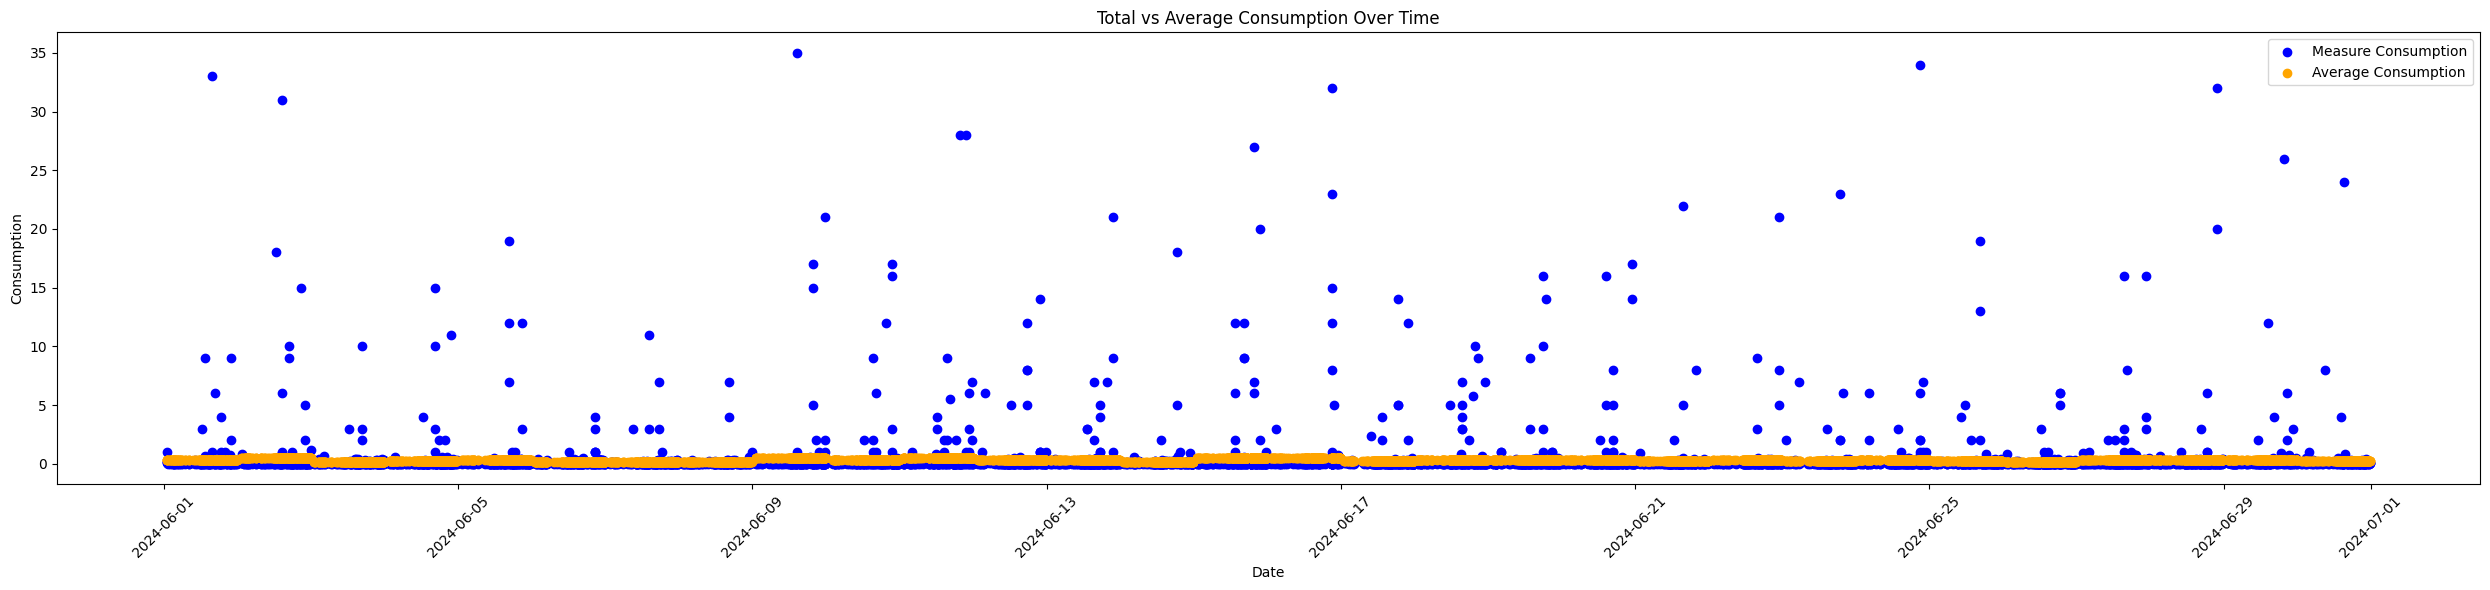

In [65]:
plt.figure(figsize=(25, 6))

plt.scatter(
    filtered_df["datetime"],
    filtered_df["measure_diff"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    filtered_df["datetime"],
    filtered_df["measure_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

Pegando um clientCode aleatório dentro aquele condomínio.

In [ ]:
target_clientCode = targetCondCodeDf["clientCode"].value_counts().index[1]
print(target_clientCode)

Gráfico do consumo desse cliente vs a média do condomínio.

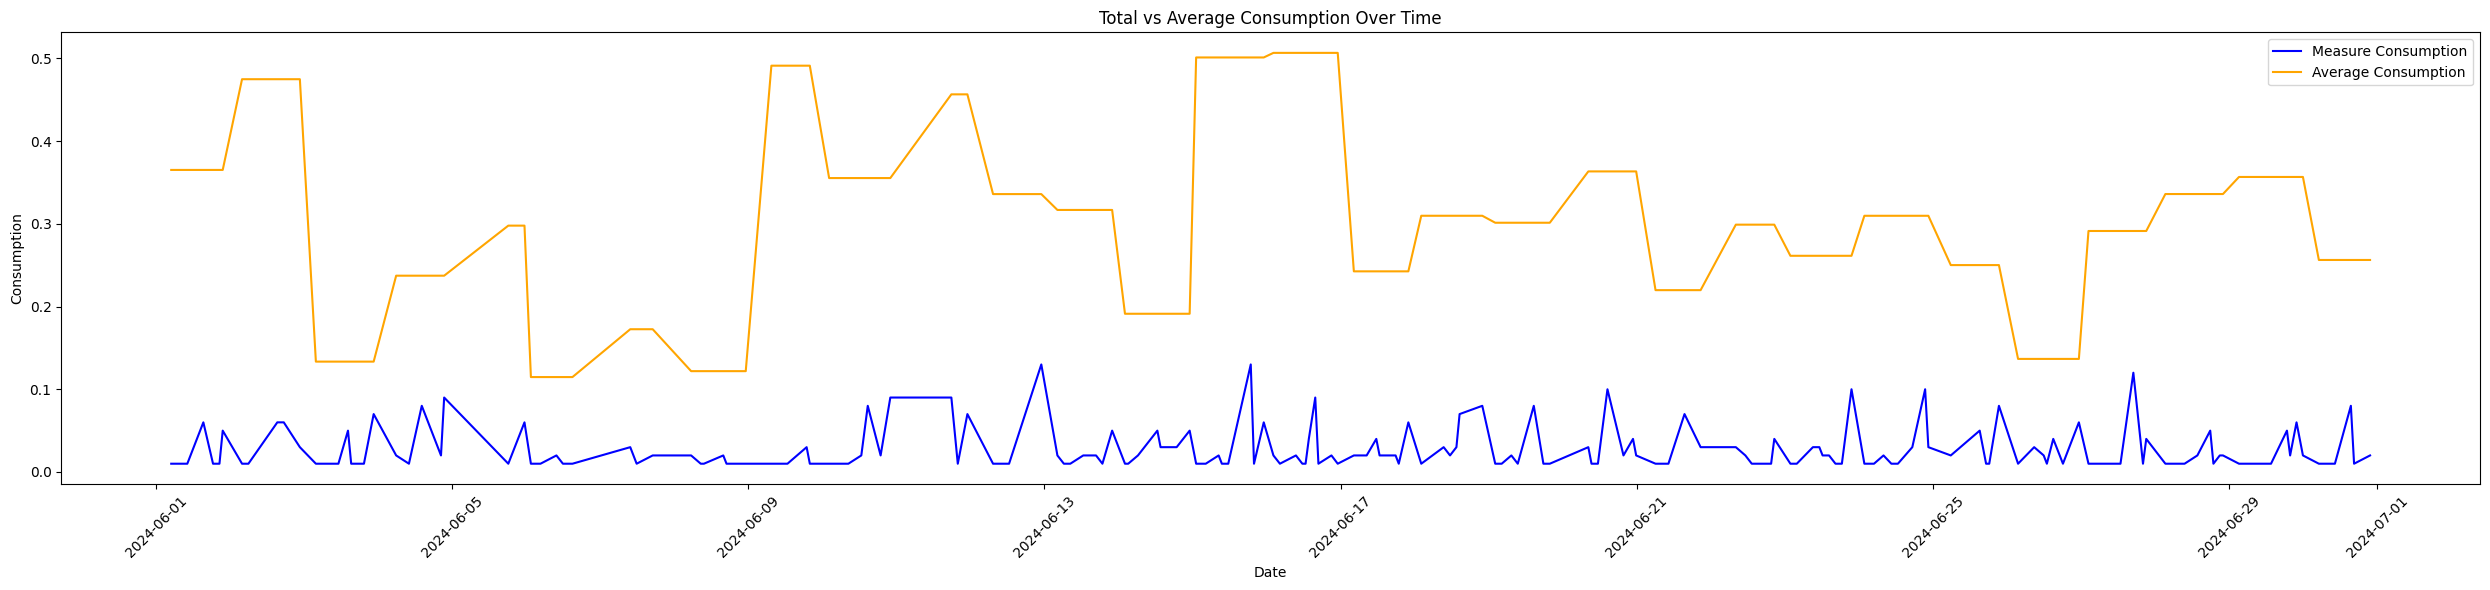

In [66]:
plt.figure(figsize=(25, 6))

plt.plot(
    filtered_df[filtered_df["clientCode"] == target_clientCode]["datetime"],
    filtered_df[filtered_df["clientCode"] == target_clientCode]["measure_diff"],
    label="Measure Consumption",
    color="blue",
)

plt.plot(
    filtered_df[filtered_df["clientCode"] == target_clientCode]["datetime"],
    filtered_df[filtered_df["clientCode"] == target_clientCode][
        "measure_avg_consumption"
    ],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
# plt.ylim(0, 0.6)
plt.tight_layout()
plt.show()

Agora, aplicando a lógica de somente um condomínio de measure_diff para todo o df.

In [67]:
df["match"] = df.clientCode.eq(df.clientCode.shift())
df["measure_diff"] = df["match"].where(
    df["match"] == False, df["totalConsumption"].diff()
)
df["measure_diff"] = pd.to_numeric(df["measure_diff"], errors="coerce")
df = df.dropna(subset=["match"])
df = df.drop(columns=["match"])
df.reset_index(drop=True, inplace=True)
df

,clientCode,clientIndex,meterIndex,initialIndex,pulseCount,gain,datetime,meterSN,inputType,model,...,cidade,categoria,contratacao,situacao,perfil_consumo,condCode,condIndex,timestamp,totalConsumption,measure_diff
0,7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...,0,24.64,10.113,1453.00,0.01,2024-02-01 05:05:51,5050102C02ZD,DI1,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0,1.706764e+09,14.53,0.00
1,7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...,0,24.64,10.113,1453.00,0.01,2024-02-01 17:34:40,5050102C02ZD,DI1,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0,1.706809e+09,14.53,0.00
2,7f8bffd14d76f3dcf3b4ad036d6df87354f8001d5d084f...,0,24.64,10.113,1453.00,0.01,2024-02-01 21:43:25,5050102C02ZD,DI1,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0,1.706824e+09,14.53,0.00
3,2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...,0,69.08,25.916,4316.00,0.01,2024-02-01 00:34:16,Z1112C100D22,DI4,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0,1.706748e+09,43.16,0.00
4,2e878272481b14207c97cfffbc4ff7573f4bafd1dbe452...,0,69.22,25.916,4330.00,0.01,2024-02-01 03:42:26,Z1112C100D22,DI4,IG1K-L-v2,...,PORTO ALEGRE,PRÉDIO EXISTENTE INDIVIDUAL,2023-06-22,CONSUMINDO GÁS,Cocção + Aquecedor,aa635a4c8a7084b3218aa1da8da0e1538e14bdea51b0d8...,0.0,1.706759e+09,43.30,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2951238,823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...,0,14.18,6.250,793.00,0.01,2024-06-30 20:29:22,6DA20240630C,DI8,IG1K-L-v2,...,GRAVATAÍ,PRÉDIO EXISTENTE INDIVIDUAL,2024-01-30,CONSUMINDO GÁS,Cocção,52236c6321c0b850935cc35d9c4cf364a2cabe67669a4c...,0.0,1.719779e+09,7.93,0.00
2951239,823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...,0,14.18,6.250,793.00,0.01,2024-06-30 21:31:57,6DA20240630C,DI8,IG1K-L-v2,...,GRAVATAÍ,PRÉDIO EXISTENTE INDIVIDUAL,2024-01-30,CONSUMINDO GÁS,Cocção,52236c6321c0b850935cc35d9c4cf364a2cabe67669a4c...,0.0,1.719783e+09,7.93,0.00
2951240,823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...,0,14.18,6.250,793.00,0.01,2024-06-30 22:34:48,6DA20240630C,DI8,IG1K-L-v2,...,GRAVATAÍ,PRÉDIO EXISTENTE INDIVIDUAL,2024-01-30,CONSUMINDO GÁS,Cocção,52236c6321c0b850935cc35d9c4cf364a2cabe67669a4c...,0.0,1.719787e+09,7.93,0.00
2951241,823ea8bee44e3bd43a004f97ffea40ced79b9021ac96d6...,0,14.18,6.250,793.00,0.01,2024-06-30 23:37:00,6DA20240630C,DI8,IG1K-L-v2,...,GRAVATAÍ,PRÉDIO EXISTENTE INDIVIDUAL,2024-01-30,CONSUMINDO GÁS,Cocção,52236c6321c0b850935cc35d9c4cf364a2cabe67669a4c...,0.0,1.719791e+09,7.93,0.00


Agora, aplicando a lógica de somente um condomínio de measure_avg_consumption para todo o df.

In [68]:
df.reset_index(drop=True, inplace=True)

df["datetime_yyyy-mm-dd"] = df["datetime"].dt.normalize()

df["measure_avg_consumption"] = None

for date in np.array(df["datetime_yyyy-mm-dd"].unique()):
    measure_avg_consumption = df[
        df["datetime_yyyy-mm-dd"].dt.to_period("D")
        == pd.to_datetime(date).to_period("D")
    ]
    measure_avg_consumption = measure_avg_consumption["measure_diff"].mean()
    df.loc[df["datetime_yyyy-mm-dd"] == date, "measure_avg_consumption"] = (
        measure_avg_consumption
    )

Escolha das colunas numéricas.

In [70]:
df = df[
    ["clientCode", "condCode", "timestamp", "measure_avg_consumption", "measure_diff"]
]

Label enconding de condCode e clientCode.

In [71]:
from sklearn.preprocessing import LabelEncoder

le_condCode = LabelEncoder()
le_clientCode = LabelEncoder()
le_condCode.fit(df["condCode"].dropna())
df["C_condCode"] = (
    df["condCode"]
    .apply(lambda x: le_condCode.transform([x])[0] if pd.notnull(x) else np.nan)
    .astype(float)
)
le_clientCode.fit(df["clientCode"].dropna())
df["C_clientCode"] = (
    df["clientCode"]
    .apply(lambda x: le_clientCode.transform([x])[0] if pd.notnull(x) else np.nan)
    .astype(float)
)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_27316\1520613396.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C_condCode'] = df['condCode'].apply(lambda x: le_condCode.transform([x])[0] if pd.notnull(x) else np.nan).astype(float)
C:\Users\Inteli\AppData\Local\Temp\ipykernel_27316\1520613396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['C_clientCode'] = df['clientCode'].apply(lambda x: le_clientCode.transform([x])[0] if pd.notnull(x) else np.nan).astype(float)


Pegando somente as medidas que efetivamente registraram algum valor.

In [77]:
df = df[df["measure_diff"] > 0]

Gráfico da média de consumo de todos os condiminios por dia vs consumo de todos usuários.

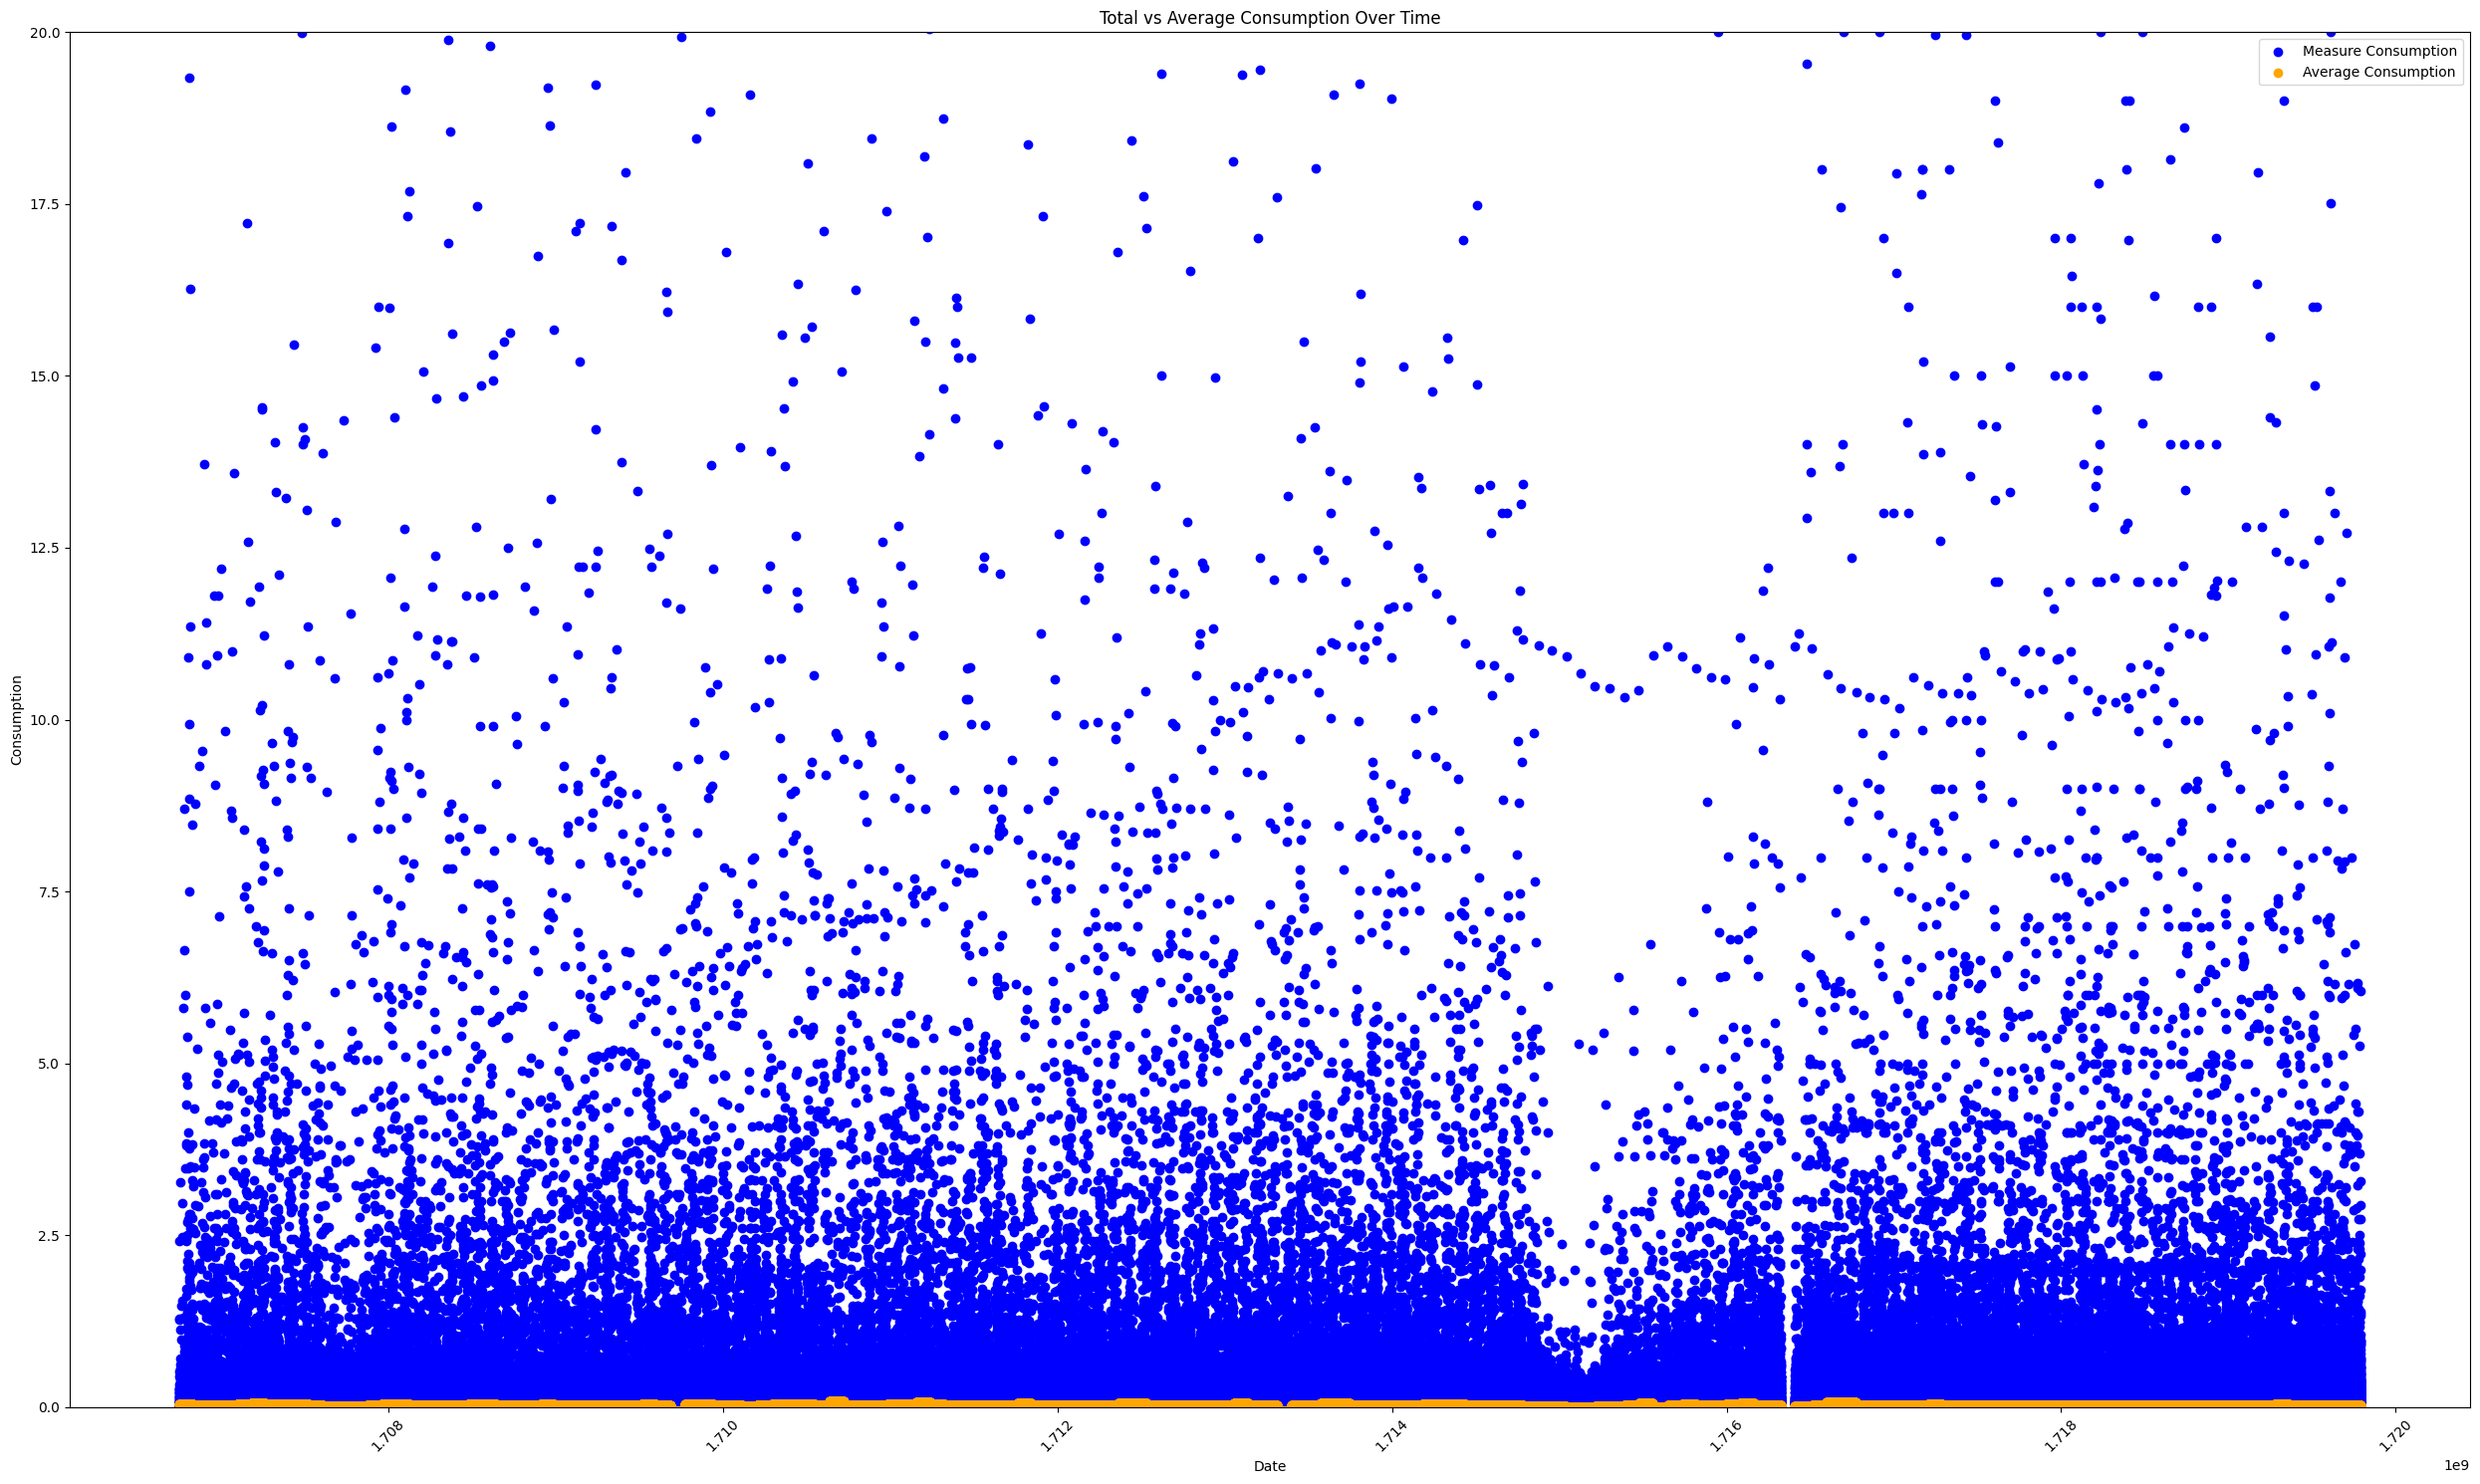

In [84]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df["timestamp"],
    df["measure_diff"],
    label="Measure Consumption",
    color="blue",
)

plt.scatter(
    df["timestamp"],
    df["measure_avg_consumption"],
    label="Average Consumption",
    color="orange",
)

plt.title("Total vs Average Consumption Over Time")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=45)

plt.legend()
plt.ylim(0, 20)
plt.tight_layout()
plt.show()

### 4.3.2. Modelo Candidato

O modelo escolhido é o **KMeans**, um algoritmo de clustering amplamente utilizado para agrupar dados com base em similaridades. Neste caso, foram selecionadas três features relevantes:

- **measure_diff**: Diferença de medidas de consumo de gás.
- **C_condCode**: Código do condomínio para identificar agrupamentos.
- **C_clientCode**: Código do cliente, que representa cada unidade de medição individual.

O modelo foi configurado para gerar **3 clusters** e distribuiu os indivíduos com base na similaridade dessas variáveis. Os clusters foram visualizados em um gráfico 3D, com os centróides claramente marcados para indicar os pontos centrais de cada grupo.

### Discussão sobre os Resultados

O KMeans conseguiu segmentar os consumidores de maneira eficaz, agrupando-os em três clusters distintos. Cada cluster representa um padrão comum de consumo de gás, levando em consideração a localização (condCode) e o comportamento individual (clientCode).

- **Os clusters formados** revelam agrupamentos de consumidores com padrões de consumo semelhantes. Isso facilita a análise de comportamento coletivo (dentro de condomínios) e individual.
- **Os centróides indicam** os padrões médios de consumo de cada grupo, sendo pontos de referência claros para comparar consumidores dentro do cluster.

**Conclusão:**  
A escolha do KMeans com 3 clusters forneceu uma segmentação clara e útil dos consumidores, destacando padrões de consumo distintos e criando uma base sólida para análise de comportamento. Essa segmentação permite identificar anomalias ou padrões específicos que podem ser explorados.

C:\Users\Inteli\AppData\Local\Temp\ipykernel_27316\1330536982.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = kmeans.fit_predict(X)


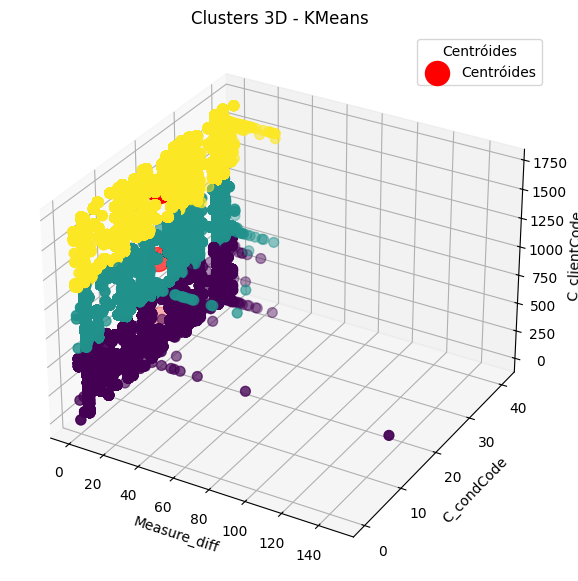

In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

df = df.dropna()

X = df[["measure_diff", "C_condCode", "C_clientCode"]]
# X = X.dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

# Configurar o gráfico em 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plotar os dados, usando as três features e colorindo de acordo com os clusters
scatter = ax.scatter(
    df["measure_diff"],
    df["C_condCode"],
    df["C_clientCode"],
    c=df["cluster"],
    cmap="viridis",
    s=50,
)

# Adicionar os centróides no gráfico
centroids = kmeans.cluster_centers_
ax.scatter(
    centroids[:, 0],
    centroids[:, 1],
    centroids[:, 2],
    s=300,
    c="red",
    label="Centróides",
)

# Configurar rótulos e título
ax.set_title("Clusters 3D - KMeans")
ax.set_xlabel("Measure_diff")
ax.set_ylabel("C_condCode")
ax.set_zlabel("C_clientCode")

# Adicionar uma legenda
legend = ax.legend(loc="upper right", title="Centróides")

# Mostrar o gráfico
plt.show()

### 4.3.3. Definição do K e Justificativa

Inicialmente, definimos o valor de **K = 3** de forma arbitrária para segmentar os consumidores. No entanto, para garantir uma escolha mais embasada, utilizamos duas métricas:

1. **Elbow Method**: Essa métrica sugere o K ideal ao avaliar a variação na soma das distâncias dentro dos clusters. O gráfico do método Elbow indicou que o valor ideal de K estaria entre **4 e 5**, já que a curva começou a suavizar nesse ponto.

2. **Silhouette Score**: Essa métrica mede a coesão e separação dos clusters. O Silhouette Score recomendou o valor de **K = 3**, indicando que, com 3 clusters, os grupos estavam mais bem definidos, com maior distância entre clusters e melhor compactação interna.

Seguindo a recomendação do **Silhouette Score**, optamos por manter **K = 3**, pois essa métrica demonstrou que esse número de clusters proporcionava uma segmentação mais clara e precisa dos consumidores.

### Definição do Elbow.

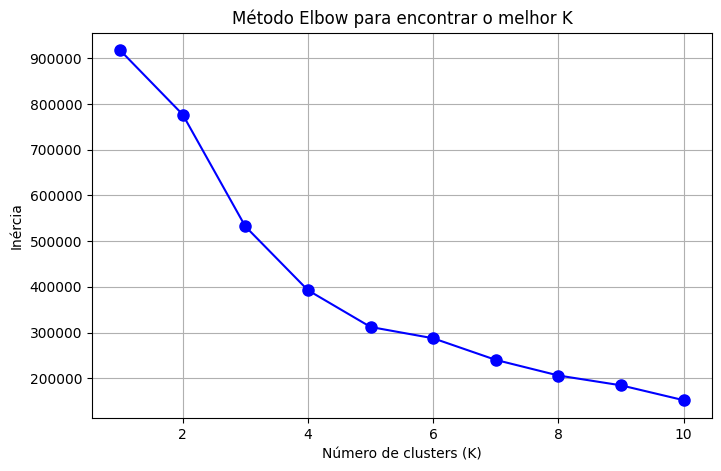

In [87]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[["measure_diff", "C_condCode", "C_clientCode"]]

features = features.dropna()

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

k_values = range(1, 11)
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, "bo-", markersize=8)
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inércia")
plt.title("Método Elbow para encontrar o melhor K")
plt.grid(True)
plt.show()

### Gráfico da Silhueta

Coeficiente médio de silhueta para K = 3: 0.5745069757953841


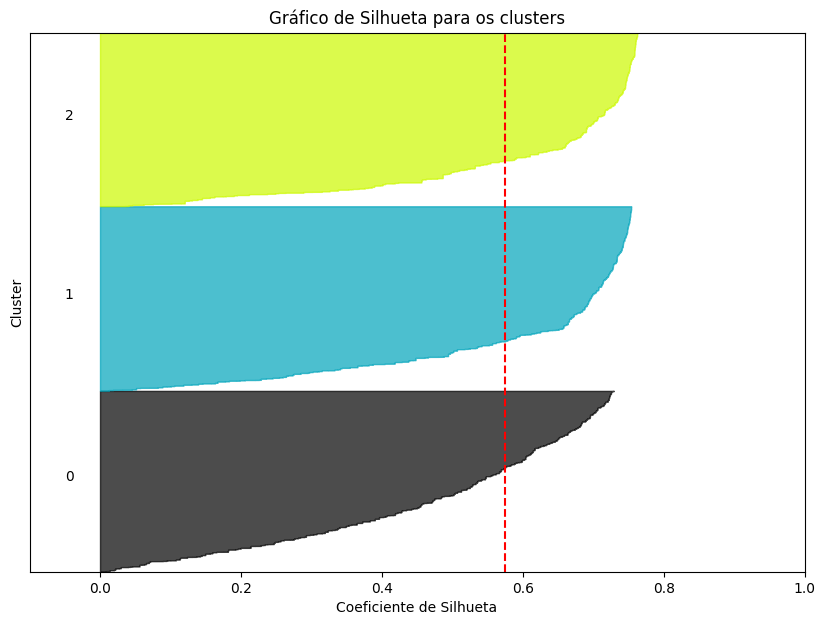

In [95]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Usando 10% dos dados como no exemplo anterior
df_sample = df.sample(frac=0.1, random_state=42)
X = df_sample[["measure_diff", "C_condCode", "C_clientCode"]]
X = X.dropna()

# Defina o valor de K (número de clusters que você deseja usar)
n_clusters = 3  # Exemplo, escolha o K apropriado

# Criando o modelo KMeans e ajustando aos dados
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Calculando o coeficiente da silhueta para cada ponto
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Coeficiente médio de silhueta para K = {n_clusters}: {silhouette_avg}")

# Calcula os valores da silhueta para cada amostra
sample_silhouette_values = silhouette_samples(X, cluster_labels)

# Iniciando o gráfico
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

# Configuração do gráfico
ax1.set_xlim([-0.1, 1])  # O coeficiente da silhueta vai de -1 a 1
ax1.set_ylim(
    [0, len(X) + (n_clusters + 1) * 10]
)  # Para deixar espaço entre os clusters

y_lower = 10
for i in range(n_clusters):
    # Agrega os valores da silhueta para o cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Rotula os clusters no meio do gráfico
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcula a nova posição do eixo y
    y_lower = y_upper + 10  # 10 para o espaço entre os clusters

# Adicionar títulos e labels ao gráfico
ax1.set_title("Gráfico de Silhueta para os clusters")
ax1.set_xlabel("Coeficiente de Silhueta")
ax1.set_ylabel("Cluster")

# A linha vertical para a média do coeficiente de silhueta
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Remover labels y
ax1.set_yticks([])

# Exibir o gráfico
plt.show()

### 4.3.4. Escolha do Tipo de Sistema de Recomendação

Optamos por um **sistema de recomendação baseado em análise de clusters e detecção de anomalias**, adequado para o cenário de monitoramento de consumo de gás. Essa abordagem permite que o sistema:

- **Identifique padrões de consumo anômalos** que desviam do comportamento usual de um determinado cluster, o que pode indicar vazamentos ou falhas em equipamentos.
- **Sugira áreas prioritárias para intervenção técnica**, utilizando dados de proximidade geográfica e consumo para identificar regiões que necessitam de manutenção preventiva.
- **Compare o consumo individual com a média do grupo**, facilitando a detecção de discrepâncias que justifiquem inspeções ou ajustes, aumentando a eficiência no controle e gestão do consumo de gás.

Essa escolha é justificada pela necessidade de um sistema que detecte variações no comportamento de consumo e priorize ações preventivas de forma precisa e ágil.

### Abaixo segue análise de cliente que mais aparece com medidas acima de 20.

Exemplo de como os insights do modelo devem ser utilizados.

In [103]:
df[df["measure_diff"] > 20]["C_clientCode"].value_counts() 

C_clientCode
1685.0    12
660.0      8
223.0      6
720.0      4
73.0       3
1641.0     2
622.0      1
540.0      1
290.0      1
Name: count, dtype: int64

DF desse cliente.


In [104]:
df[df["C_clientCode"] == 1685]

,clientCode,condCode,timestamp,measure_avg_consumption,measure_diff,C_condCode,C_clientCode,cluster
368544,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.707429e+09,0.043408,0.03,36.0,1685.0,2
698509,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.711551e+09,0.028303,0.07,36.0,1685.0,2
698510,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.711570e+09,0.028303,0.03,36.0,1685.0,2
698512,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.711581e+09,0.028303,0.01,36.0,1685.0,2
716086,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.711656e+09,0.029778,0.04,36.0,1685.0,2
...,...,...,...,...,...,...,...,...
2920823,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.719693e+09,0.026367,6.00,36.0,1685.0,2
2944068,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.719719e+09,0.0227,1.00,36.0,1685.0,2
2944070,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.719738e+09,0.0227,8.00,36.0,1685.0,2
2944072,fb95c2873b331ea10bb1f00af1d48bb51cf0546876118a...,d9eea3f08d842822cce7cc4d39635f5fe5df87c986f981...,1.719757e+09,0.0227,4.00,36.0,1685.0,2


Coluna datetime a partir da timestamp.

In [129]:
import datetime

df["datetime"] = df["timestamp"].apply(
    lambda x: (datetime.datetime.fromtimestamp(x) if pd.notnull(x) else None)
)

C:\Users\Inteli\AppData\Local\Temp\ipykernel_27316\2148867399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = df["timestamp"].apply(


Usuário vs média de seu condominio em diferentes escalas.


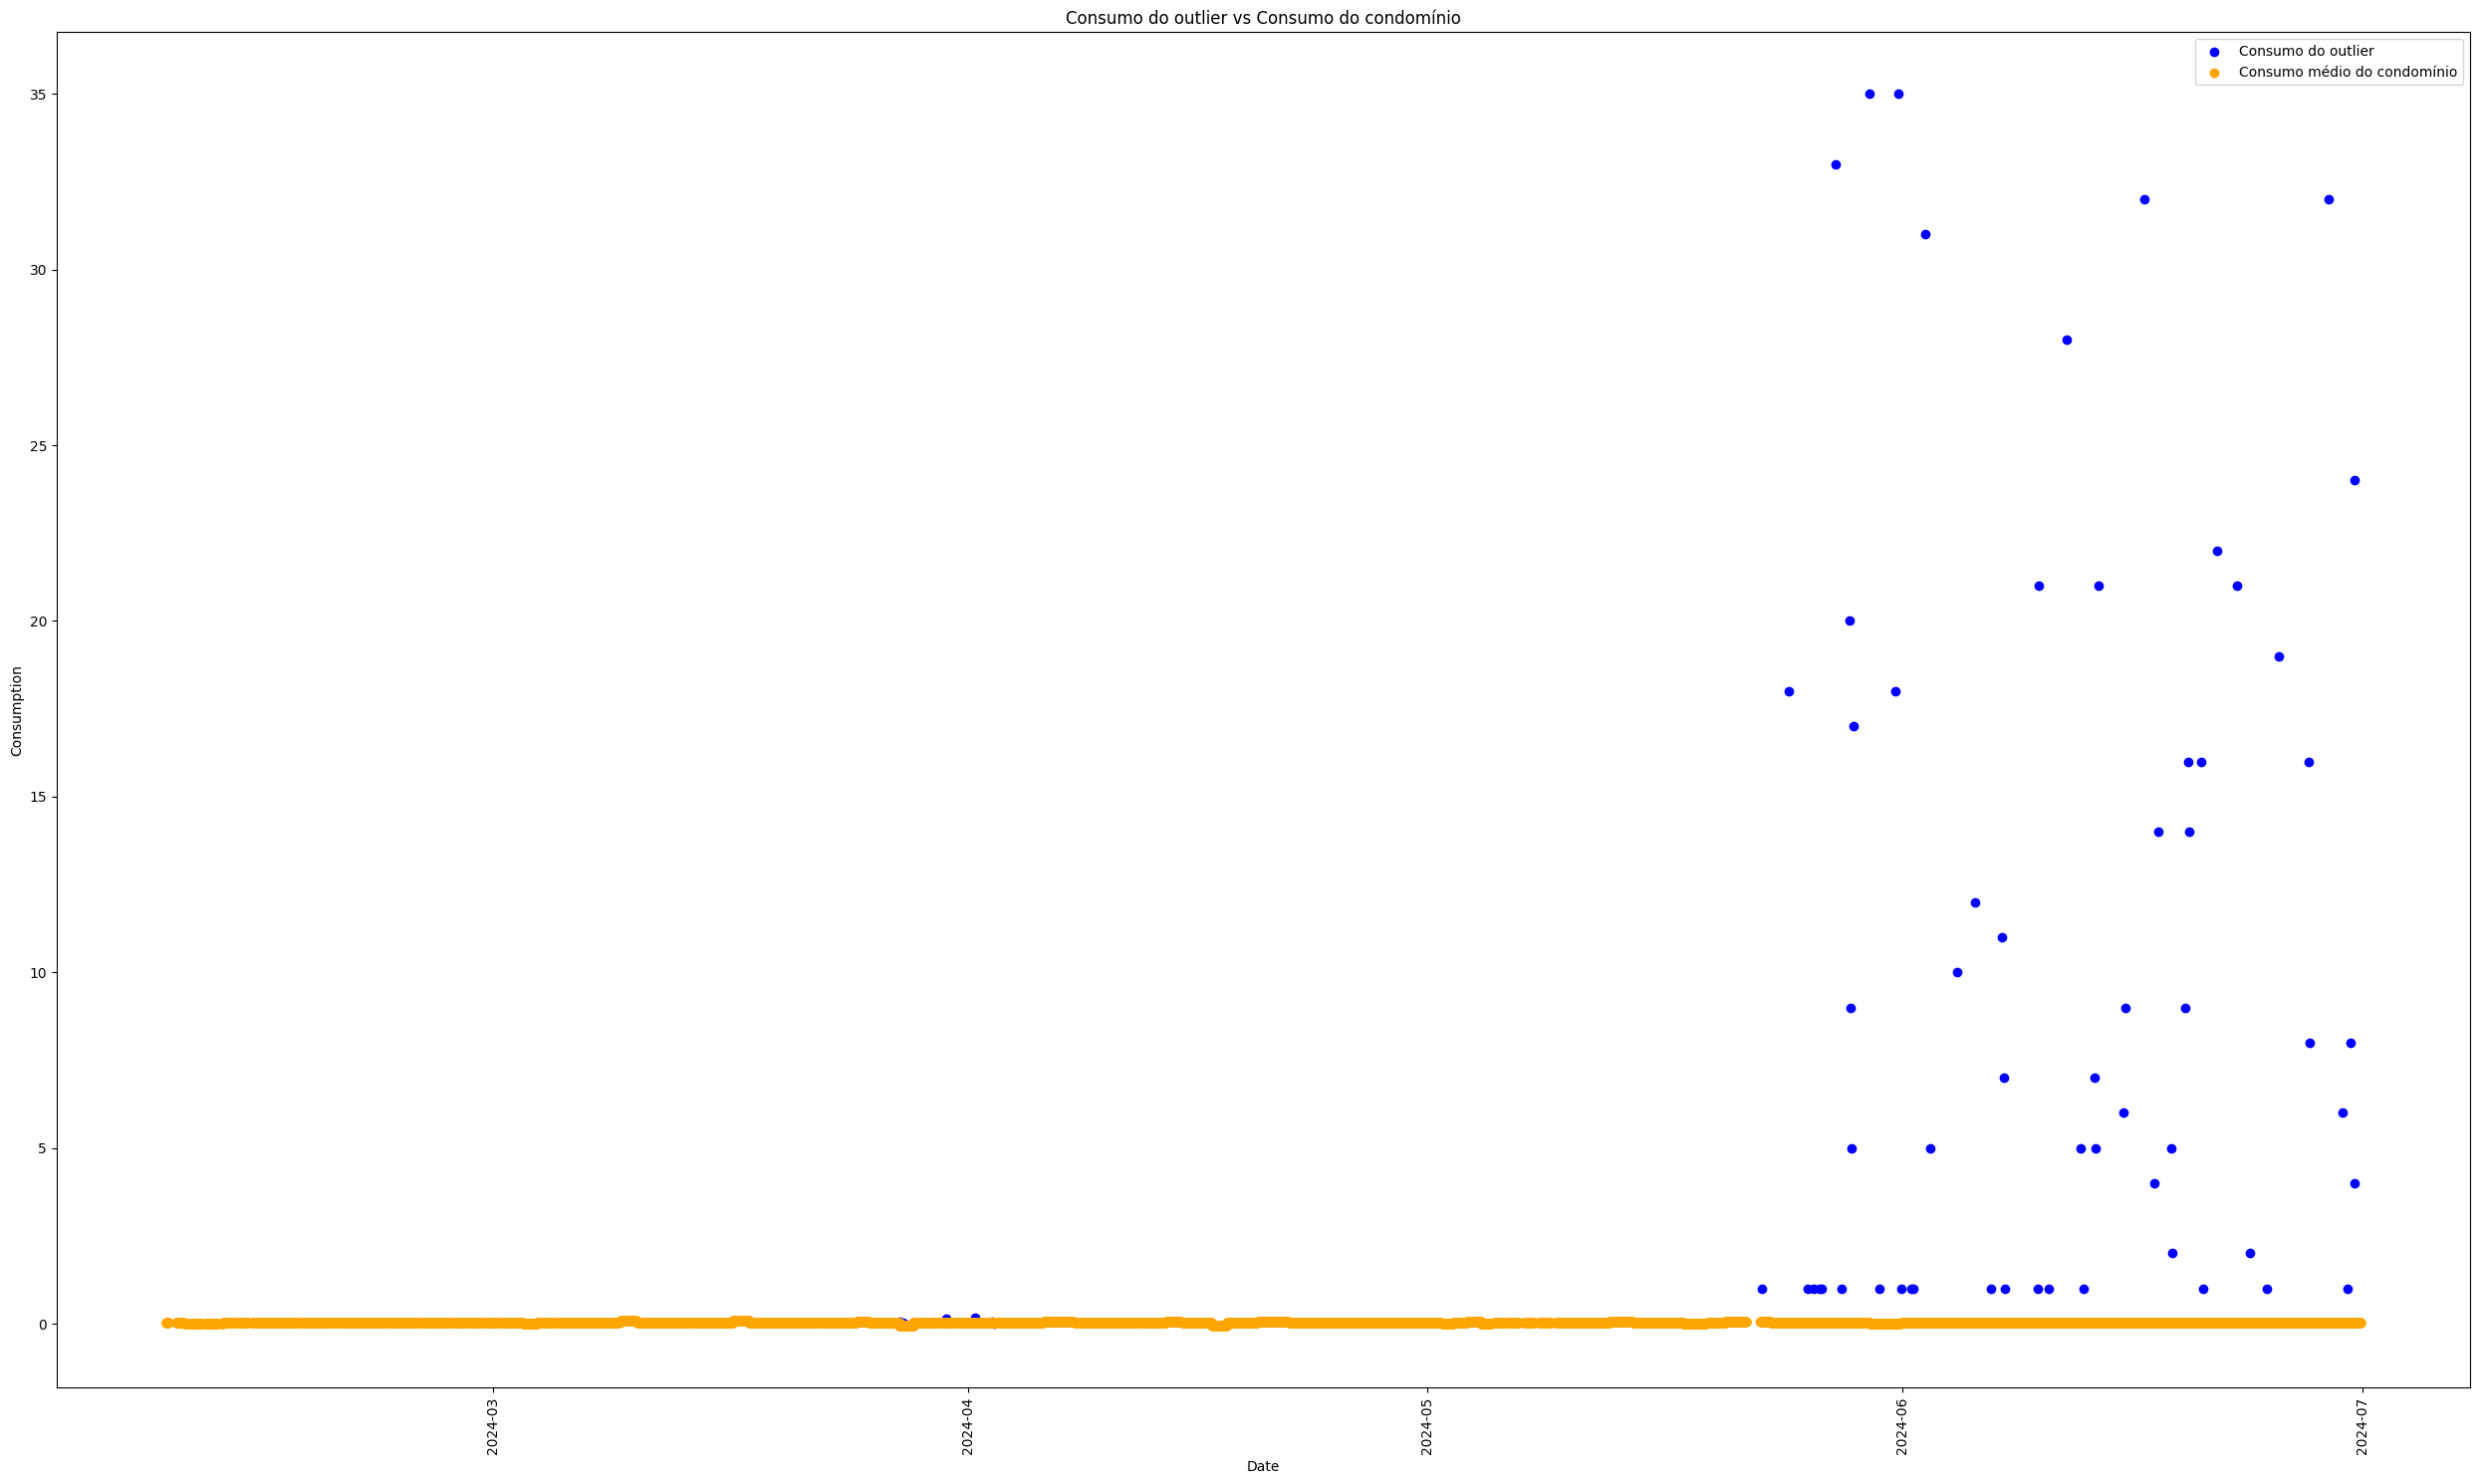

In [130]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df[(df["C_clientCode"] == 1685)]["datetime"],
    df[(df["C_clientCode"] == 1685)]["measure_diff"],
    label="Consumo do outlier",
    color="blue",
)

plt.scatter(
    df[(df["C_condCode"] == 36)]["datetime"].sort_values(ascending=True),
    df[(df["C_condCode"] == 36)]["measure_avg_consumption"],
    label="Consumo médio do condomínio",
    color="orange",
)

plt.title("Consumo do outlier vs Consumo do condomínio")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()

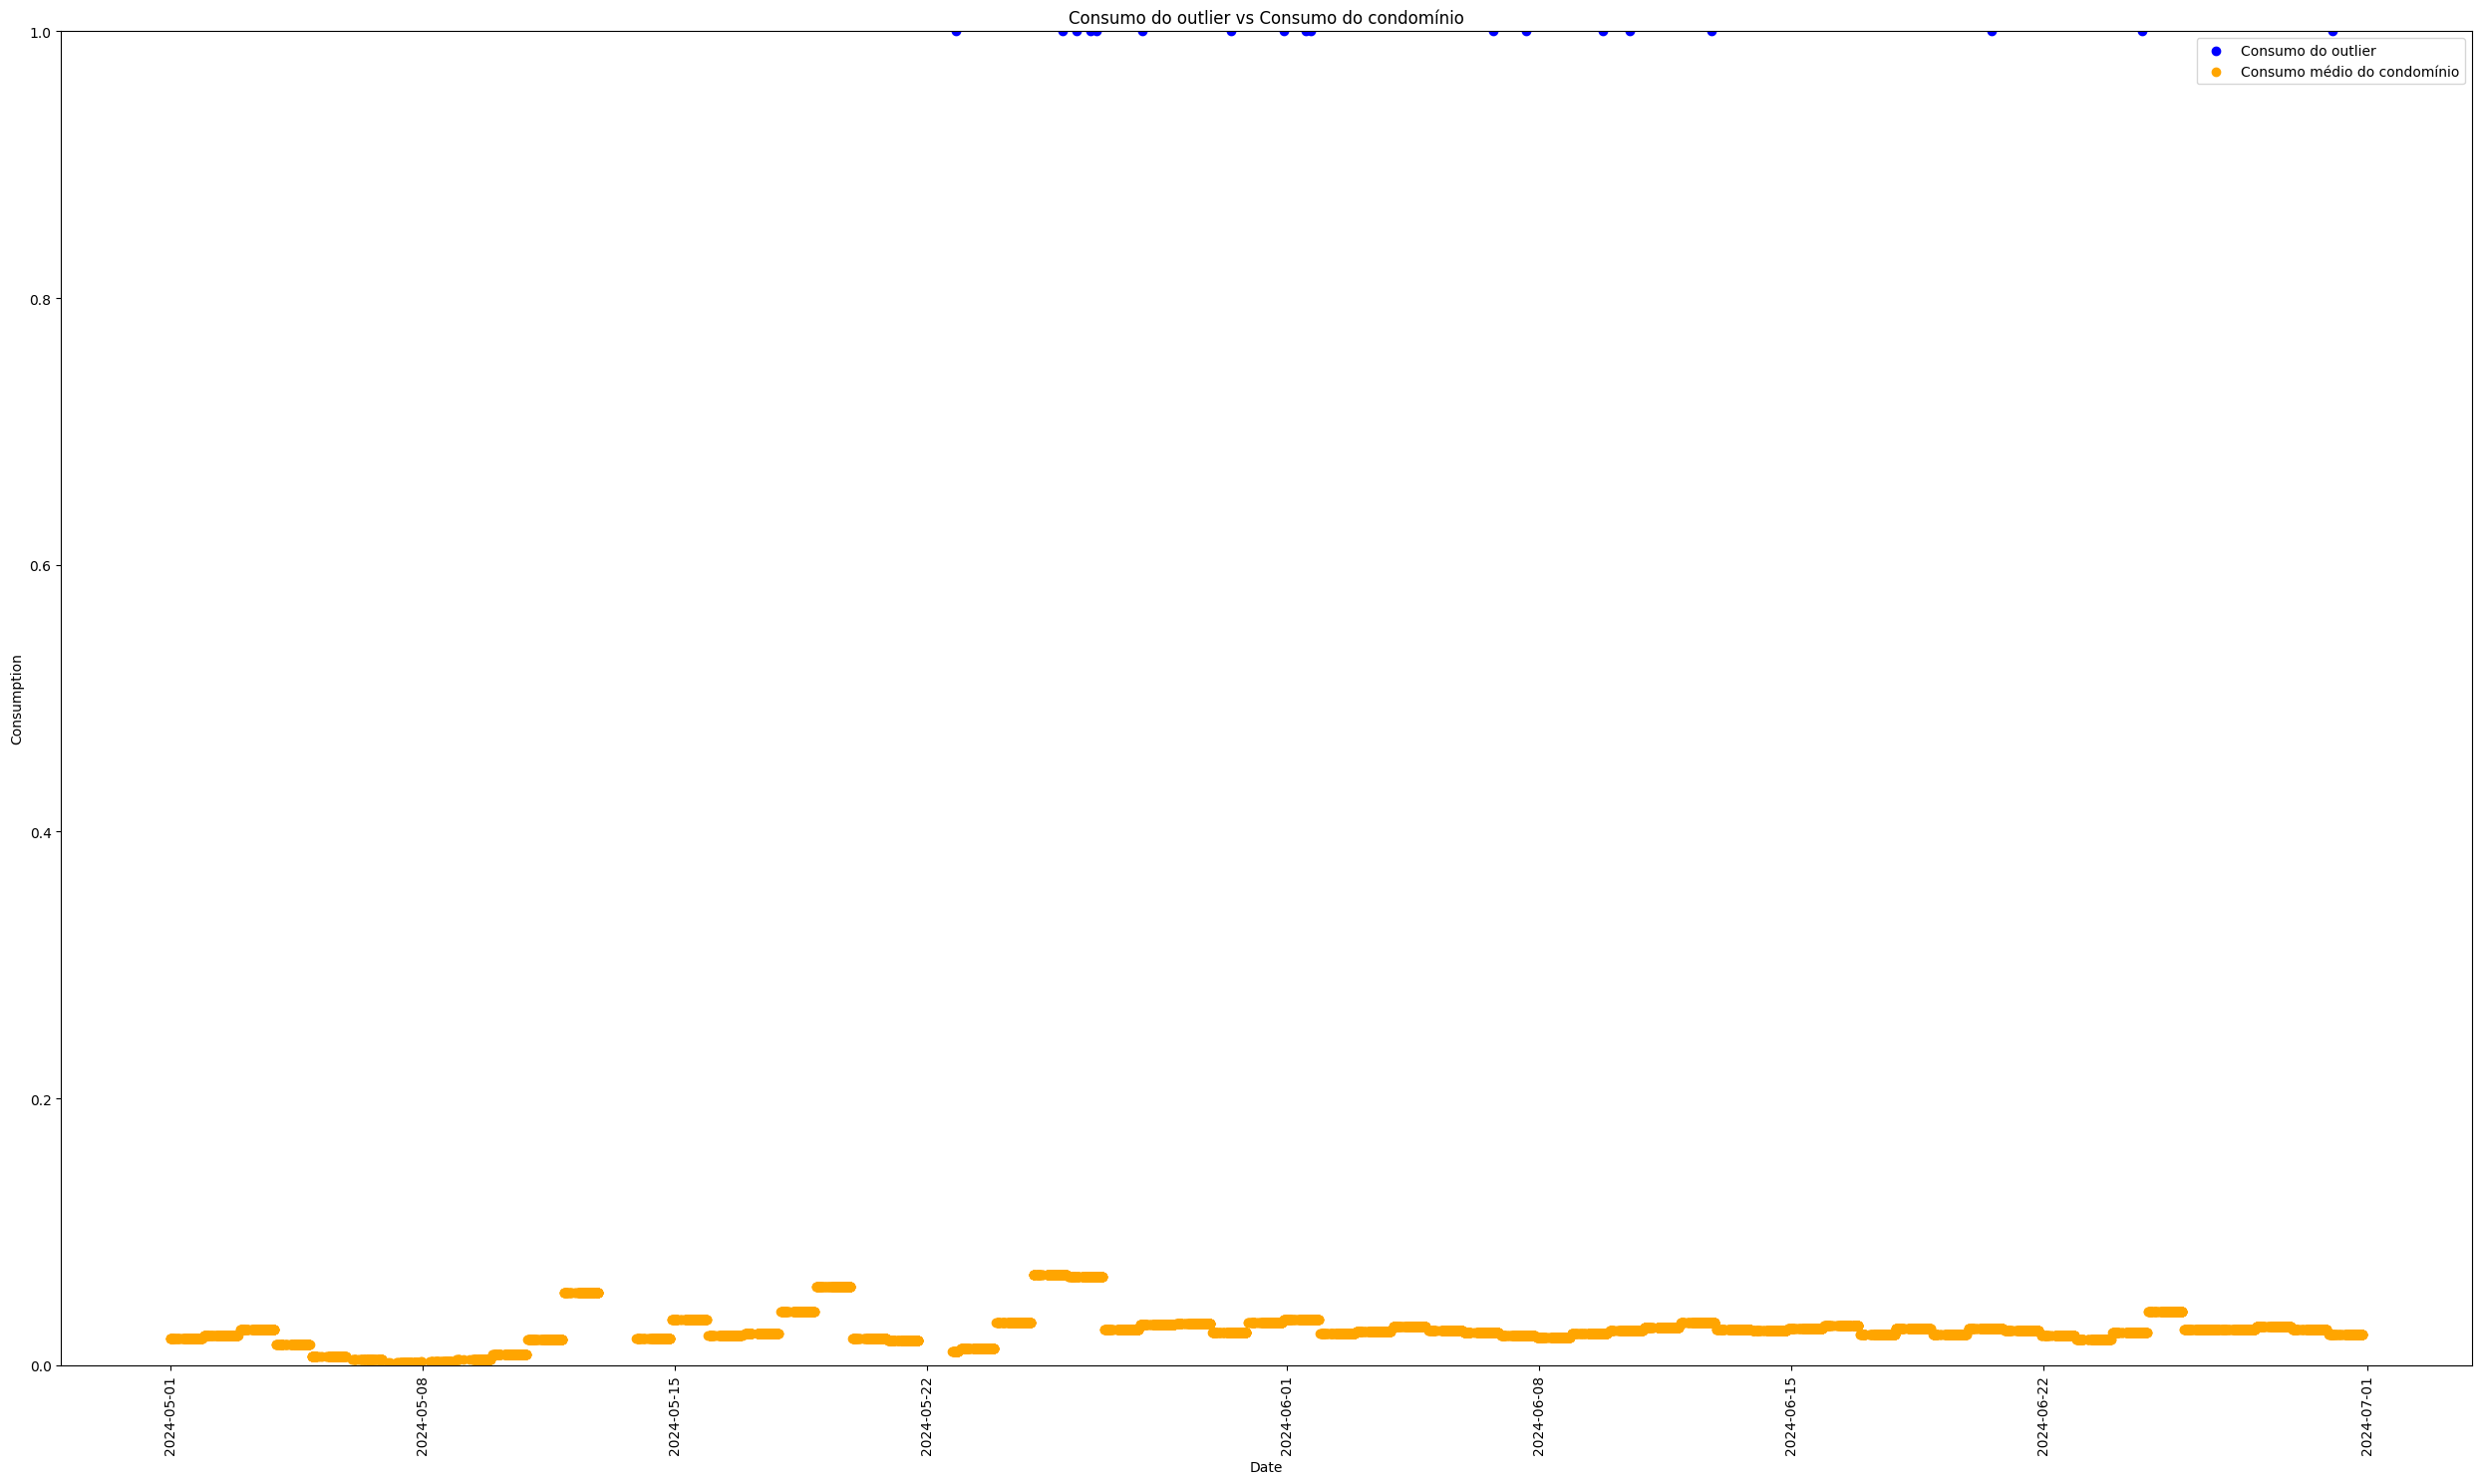

In [131]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["measure_diff"],
    label="Consumo do outlier",
    color="blue",
)

plt.scatter(
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")][
        "measure_avg_consumption"
    ],
    label="Consumo médio do condomínio",
    color="orange",
)

plt.title("Consumo do outlier vs Consumo do condomínio")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=90)

plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

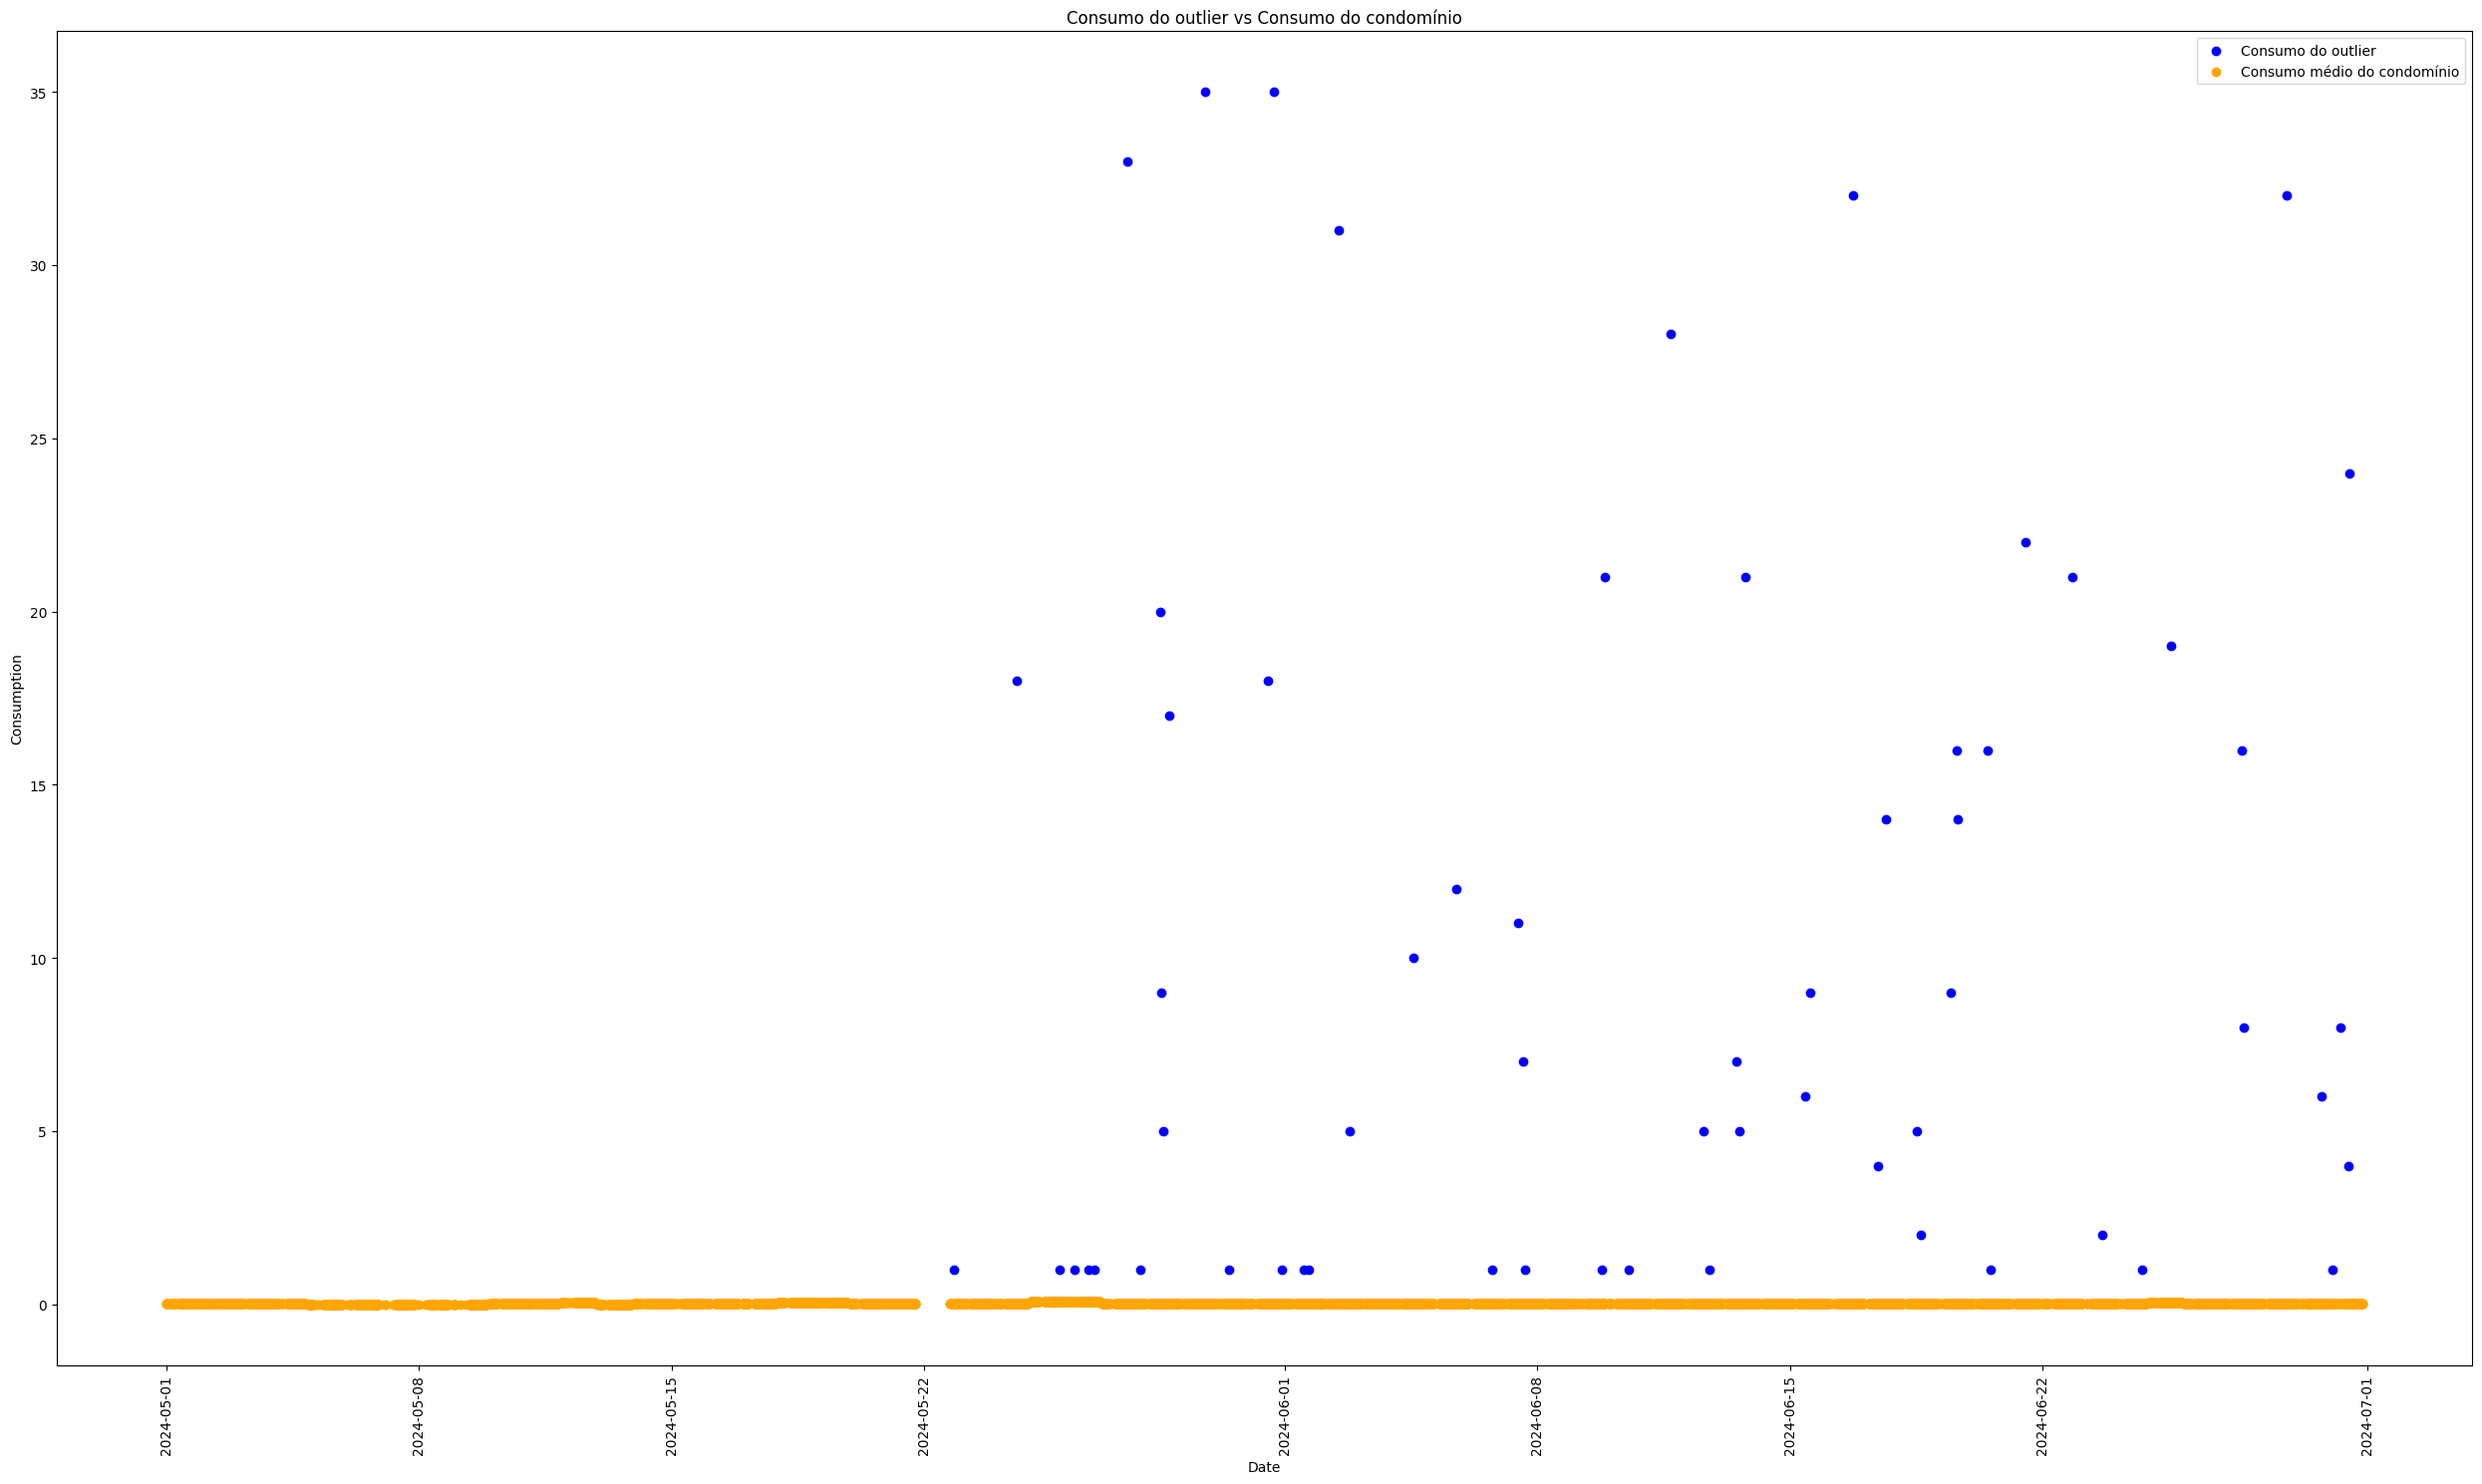

In [132]:
plt.figure(figsize=(25, 15))

plt.scatter(
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_clientCode"] == 1685) & (df["datetime"] > "2024-05")]["measure_diff"],
    label="Consumo do outlier",
    color="blue",
)

plt.scatter(
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")]["datetime"],
    df[(df["C_condCode"] == 36) & (df["datetime"] > "2024-05")][
        "measure_avg_consumption"
    ],
    label="Consumo médio do condomínio",
    color="orange",
)

plt.title("Consumo do outlier vs Consumo do condomínio")
plt.xlabel("Date")
plt.ylabel("Consumption")


plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()
plt.show()